In [1]:
import tensorflow as tf
import numpy as np
import random
from constants import TASK_LIST
from constants import INITIAL_ALPHA
from constants import INITIAL_GAMMA
from constants import EPSILON
from constants import NUM_TRA_EPISODES
from constants import NUM_EVAL_EPISODES
from scene_loader import THORDiscreteEnvironment as Environment
from RLalgs.utils import epsilon_greedy
from RLalgs.utils import action_selection


def QLearning(env, num_episodes, gamma, lr, e, plot_list):
    """
    Implement the Q-learning algorithm following the epsilon-greedy exploration.

    Inputs:
    env: THORDiscreteEnvironment
    num_episodes: int
            Number of episodes of training
    gamma: float
            Discount factor.
    lr: float
            Learning rate.
    e: float
            Epsilon value used in the epsilon-greedy method.

    Outputs:
    Q: numpy.ndarray
    """

    Q = np.zeros((env.n_locations, env.nA))
    #i =0
    #while True:
    for i in range(num_episodes):
        env.reset()
        current_state = env.current_state_id
        episode_reward = 0
        episode_length = 0
        start = current_state
        if start not in plot_list:
            plot_list[start]=[]
        delta = []
        while env.terminal==False and episode_length<10000:
            action = epsilon_greedy(Q[current_state], e)
            S = env.step(action)
            if env.terminal == True:
                R = 1
            elif env.collided == True:
                R = -0.1
            else: R = -0.05
            episode_length += 1
            episode_reward += R
            delta.append(R + 0.9 * np.max(Q[S]) - Q[current_state, action])
            Q[current_state, action] = Q[current_state, action] + lr * (R + 0.9 * np.max(Q[S]) - Q[current_state, action])
            current_state = env.current_state_id
        #i = i+1
        print ("episodes: ", i)
        print ("delta: ", np.mean(delta))
        plot_list[start].append(episode_reward)
        #if abs(np.mean(delta)) < 0.001: break

    

    return Q






RLalgs is a package containing Reinforcement Learning algorithms Epsilon-Greedy, Policy Iteration, Value Iteration, Q-Learning, and SARSA.


In [2]:
# #Q Learning for realizing the navigation
# if __name__ == '__main__':

list_of_tasks = TASK_LIST
scene_scopes = list_of_tasks.keys()

initial_learning_rate = INITIAL_ALPHA
gamma = INITIAL_GAMMA

branches = []
for scene in scene_scopes:
    for task in list_of_tasks[scene]:
        branches.append((scene, task))

scene, task = branches[0]


env = Environment({
    'scene_name': scene,
    'terminal_state_id': int(task)
})
env.reset()
plot_list = {}
Q = QLearning(env, NUM_TRA_EPISODES, gamma, initial_learning_rate, EPSILON, plot_list)
print (Q)



episodes:  0
delta:  -0.04104477611940298
episodes:  1
delta:  0.0037688989131297226
episodes:  2
delta:  0.003333094658291667
episodes:  3
delta:  0.045684041726428246
episodes:  4
delta:  0.006352428590381189
episodes:  5
delta:  0.002258841485369154
episodes:  6
delta:  0.008882254993666443
episodes:  7
delta:  0.010224091727370712
episodes:  8
delta:  0.007167211579689298
episodes:  9
delta:  1.153847736261
episodes:  10
delta:  0.48041254285447504
episodes:  11
delta:  0.022006162865300063
episodes:  12
delta:  0.008360066497957907
episodes:  13
delta:  0.004583073771148318
episodes:  14
delta:  0.0028037596803526577
episodes:  15
delta:  0.004801240037984926
episodes:  16
delta:  0.014129248164476041
episodes:  17
delta:  0.007263547233322453
episodes:  18
delta:  0.006389970193698418
episodes:  19
delta:  0.01959533496477816
episodes:  20
delta:  0.01629091890150823
episodes:  21
delta:  0.011853628307650113
episodes:  22
delta:  0.015433635279962684
episodes:  23
delta:  0.0201

episodes:  193
delta:  0.08207050437429105
episodes:  194
delta:  0.079041496789103
episodes:  195
delta:  0.06369176243970291
episodes:  196
delta:  0.08970695483063094
episodes:  197
delta:  1.596252278153489
episodes:  198
delta:  0.07206148398416717
episodes:  199
delta:  0.08209844101356224
episodes:  200
delta:  0.5089842427115191
episodes:  201
delta:  0.0886100591366424
episodes:  202
delta:  0.065149708582645
episodes:  203
delta:  0.3523844173915151
episodes:  204
delta:  0.06980480647300935
episodes:  205
delta:  3.1135843457118253
episodes:  206
delta:  0.048259322808126386
episodes:  207
delta:  0.094612087489388
episodes:  208
delta:  0.08552479995564187
episodes:  209
delta:  0.104124455582068
episodes:  210
delta:  0.13830009958735887
episodes:  211
delta:  0.5856208174061415
episodes:  212
delta:  2.1597224153061085
episodes:  213
delta:  1.4259785556133888
episodes:  214
delta:  0.07765561006923745
episodes:  215
delta:  0.10855095108846348
episodes:  216
delta:  0.15

episodes:  385
delta:  0.027622549887863855
episodes:  386
delta:  0.07352420095515196
episodes:  387
delta:  0.12611969070536105
episodes:  388
delta:  0.4635054956885873
episodes:  389
delta:  1.867656270376789
episodes:  390
delta:  0.03530023562566995
episodes:  391
delta:  0.046846236836049444
episodes:  392
delta:  0.28965305156513893
episodes:  393
delta:  0.0177900419980202
episodes:  394
delta:  0.017296002540813683
episodes:  395
delta:  0.03723805298374108
episodes:  396
delta:  0.021625544024484498
episodes:  397
delta:  0.04860519556702206
episodes:  398
delta:  0.08055833741466237
episodes:  399
delta:  0.04771601725094918
episodes:  400
delta:  0.03402719348034219
episodes:  401
delta:  0.11588780225358297
episodes:  402
delta:  0.041639939315668735
episodes:  403
delta:  0.020082377569974837
episodes:  404
delta:  0.017609045593316
episodes:  405
delta:  0.1473665144508071
episodes:  406
delta:  0.026938026378522047
episodes:  407
delta:  1.549013043975767
episodes:  40

episodes:  577
delta:  0.019291450646787955
episodes:  578
delta:  0.27641731880808074
episodes:  579
delta:  0.01811590245145257
episodes:  580
delta:  0.01840014470345517
episodes:  581
delta:  0.010707031757083969
episodes:  582
delta:  0.024366453077544006
episodes:  583
delta:  0.010575311214756548
episodes:  584
delta:  0.006752949714308517
episodes:  585
delta:  0.033976637633486295
episodes:  586
delta:  0.16285042571332672
episodes:  587
delta:  0.012606301422797957
episodes:  588
delta:  0.12085859815020505
episodes:  589
delta:  0.23067255329571618
episodes:  590
delta:  0.022062011295078187
episodes:  591
delta:  0.01701392692745182
episodes:  592
delta:  0.019239783980365157
episodes:  593
delta:  0.2424250136067912
episodes:  594
delta:  0.00665376554349682
episodes:  595
delta:  0.016368706717690366
episodes:  596
delta:  0.01170672125812263
episodes:  597
delta:  0.5749401546004068
episodes:  598
delta:  0.011566390833853142
episodes:  599
delta:  0.01818190657991421
ep

episodes:  766
delta:  0.0018570390428551819
episodes:  767
delta:  0.03379229889172919
episodes:  768
delta:  0.03217550446343103
episodes:  769
delta:  0.02062989414857435
episodes:  770
delta:  0.012165343275909285
episodes:  771
delta:  0.016435163259670885
episodes:  772
delta:  0.012241603766153904
episodes:  773
delta:  0.010039068137357283
episodes:  774
delta:  0.007345650204358175
episodes:  775
delta:  0.011820740990733611
episodes:  776
delta:  0.0024630054264475143
episodes:  777
delta:  0.06264625191201341
episodes:  778
delta:  0.05832592337898589
episodes:  779
delta:  0.007703524520870542
episodes:  780
delta:  0.007708245355496221
episodes:  781
delta:  0.027560972375380847
episodes:  782
delta:  0.011643314114142222
episodes:  783
delta:  0.01960522706751379
episodes:  784
delta:  0.01857182045858063
episodes:  785
delta:  0.5641312517763803
episodes:  786
delta:  0.00777593689815248
episodes:  787
delta:  0.015249837393552956
episodes:  788
delta:  0.004507045114905

episodes:  955
delta:  0.009983750856510641
episodes:  956
delta:  0.07926372158063796
episodes:  957
delta:  0.007963487935403791
episodes:  958
delta:  0.005034243887171734
episodes:  959
delta:  0.01656712718107123
episodes:  960
delta:  0.0013326558806239525
episodes:  961
delta:  0.957383740150169
episodes:  962
delta:  0.0004850480252134385
episodes:  963
delta:  0.0020435953570764323
episodes:  964
delta:  0.003960580628102319
episodes:  965
delta:  0.007699522953168318
episodes:  966
delta:  0.07990836408329313
episodes:  967
delta:  0.114340375990315
episodes:  968
delta:  0.001291849328766025
episodes:  969
delta:  0.005466949881505951
episodes:  970
delta:  0.007243426026360579
episodes:  971
delta:  0.006262249980950427
episodes:  972
delta:  0.0019268483290824315
episodes:  973
delta:  0.0051073514074665505
episodes:  974
delta:  0.005251399301771791
episodes:  975
delta:  0.3069887375090389
episodes:  976
delta:  0.0029582305605119533
episodes:  977
delta:  0.008485877983

episodes:  1138
delta:  0.0012690470638009005
episodes:  1139
delta:  0.0008464553767471273
episodes:  1140
delta:  0.235268375299958
episodes:  1141
delta:  0.003687054627880136
episodes:  1142
delta:  0.004080805867730071
episodes:  1143
delta:  0.02862968873953002
episodes:  1144
delta:  0.002373879393852963
episodes:  1145
delta:  0.011292624680574499
episodes:  1146
delta:  0.0009025599251639669
episodes:  1147
delta:  0.1822153729443321
episodes:  1148
delta:  0.0010614757646949323
episodes:  1149
delta:  0.009757577319614257
episodes:  1150
delta:  0.007693344918816228
episodes:  1151
delta:  0.002578570206182253
episodes:  1152
delta:  0.18976862714670953
episodes:  1153
delta:  0.02053207202937793
episodes:  1154
delta:  0.008472290261645947
episodes:  1155
delta:  0.0009747668906110654
episodes:  1156
delta:  0.00043509566925062614
episodes:  1157
delta:  0.09973036041302166
episodes:  1158
delta:  0.00017303894198628979
episodes:  1159
delta:  0.004898511448840679
episodes: 

episodes:  1320
delta:  0.0025861189432627328
episodes:  1321
delta:  0.00011581445397098481
episodes:  1322
delta:  0.003437561053301405
episodes:  1323
delta:  0.0023033714646200614
episodes:  1324
delta:  0.01920691991514083
episodes:  1325
delta:  0.0018555887303831227
episodes:  1326
delta:  0.843921312083927
episodes:  1327
delta:  0.0031522116002821008
episodes:  1328
delta:  0.1867452500720374
episodes:  1329
delta:  0.0024134968441550417
episodes:  1330
delta:  0.0025710072716609808
episodes:  1331
delta:  0.00022886188376442171
episodes:  1332
delta:  0.006435301102616753
episodes:  1333
delta:  7.511719063163725e-05
episodes:  1334
delta:  0.0009284075143156778
episodes:  1335
delta:  0.014878586600674723
episodes:  1336
delta:  0.0964284970320292
episodes:  1337
delta:  0.000379612134824292
episodes:  1338
delta:  0.0061229019005197335
episodes:  1339
delta:  0.007348417704083531
episodes:  1340
delta:  0.008191871488505259
episodes:  1341
delta:  0.0019253014591519057
epis

episodes:  1501
delta:  2.053601442128374e-05
episodes:  1502
delta:  0.04247013197540282
episodes:  1503
delta:  0.004403126040891305
episodes:  1504
delta:  0.0014028519960575128
episodes:  1505
delta:  0.05024185788035922
episodes:  1506
delta:  0.11165964663558908
episodes:  1507
delta:  0.00011474201451910915
episodes:  1508
delta:  0.0008110682947805877
episodes:  1509
delta:  0.0008200396853807843
episodes:  1510
delta:  0.00031586425890104406
episodes:  1511
delta:  0.0008408137230282419
episodes:  1512
delta:  0.0001915007233900429
episodes:  1513
delta:  0.00012203548651701368
episodes:  1514
delta:  0.010482566947799435
episodes:  1515
delta:  0.0018308131663895308
episodes:  1516
delta:  0.006482179315453346
episodes:  1517
delta:  0.06898807367443324
episodes:  1518
delta:  0.0008913143633411854
episodes:  1519
delta:  0.010545680634236857
episodes:  1520
delta:  0.004849014304492239
episodes:  1521
delta:  0.00291961301705189
episodes:  1522
delta:  0.001983787342212469
e

episodes:  1682
delta:  5.555835628113371e-06
episodes:  1683
delta:  0.003598175769879686
episodes:  1684
delta:  4.781267336776788e-05
episodes:  1685
delta:  4.108235554234341e-05
episodes:  1686
delta:  0.002492837972590006
episodes:  1687
delta:  0.5219781315035698
episodes:  1688
delta:  0.0012695348516767822
episodes:  1689
delta:  8.582804455148363e-05
episodes:  1690
delta:  0.0001118655895896767
episodes:  1691
delta:  0.009142825387211912
episodes:  1692
delta:  0.022023745364048376
episodes:  1693
delta:  2.5652388407393756e-05
episodes:  1694
delta:  7.415528091916815e-05
episodes:  1695
delta:  0.048078437994971315
episodes:  1696
delta:  8.724887184060181e-06
episodes:  1697
delta:  0.00012690649031846986
episodes:  1698
delta:  0.00010474080896478842
episodes:  1699
delta:  0.0005940849143937912
episodes:  1700
delta:  0.0939263801163377
episodes:  1701
delta:  0.00017010260233548037
episodes:  1702
delta:  0.0005510259999041978
episodes:  1703
delta:  5.887341922372613

episodes:  1863
delta:  0.006776451229304315
episodes:  1864
delta:  0.00134776792746008
episodes:  1865
delta:  0.19357177410873583
episodes:  1866
delta:  0.0019129913847537204
episodes:  1867
delta:  1.6561768974909796e-05
episodes:  1868
delta:  0.001185516444303276
episodes:  1869
delta:  0.0010391170926806006
episodes:  1870
delta:  0.09275447407421676
episodes:  1871
delta:  0.0003324033158735984
episodes:  1872
delta:  0.00919285841515022
episodes:  1873
delta:  0.0015494580476822285
episodes:  1874
delta:  0.01528020295940318
episodes:  1875
delta:  3.157328020552639e-06
episodes:  1876
delta:  4.533851835196808e-05
episodes:  1877
delta:  8.201004419561286e-06
episodes:  1878
delta:  0.01252264881671674
episodes:  1879
delta:  0.0011457762102776625
episodes:  1880
delta:  0.0008523086109412762
episodes:  1881
delta:  0.0022942500680105666
episodes:  1882
delta:  0.004311084223930832
episodes:  1883
delta:  0.028110459620720084
episodes:  1884
delta:  0.00178123194081077
episo

episodes:  2045
delta:  0.00014040793813753055
episodes:  2046
delta:  2.439368094766305e-06
episodes:  2047
delta:  0.713733545838308
episodes:  2048
delta:  0.00016832554048886467
episodes:  2049
delta:  0.0007626646022052294
episodes:  2050
delta:  0.002724289765588757
episodes:  2051
delta:  0.018765243008218666
episodes:  2052
delta:  0.00045975472674972793
episodes:  2053
delta:  0.03709260892674848
episodes:  2054
delta:  0.0003425814598509587
episodes:  2055
delta:  0.8177994914587895
episodes:  2056
delta:  0.0031903472866200698
episodes:  2057
delta:  0.0037457573012960508
episodes:  2058
delta:  0.0032585750648792488
episodes:  2059
delta:  2.4383909247815314e-06
episodes:  2060
delta:  1.428322098291801e-05
episodes:  2061
delta:  0.004468400485482169
episodes:  2062
delta:  3.816764439200172e-05
episodes:  2063
delta:  1.4076239957816484e-05
episodes:  2064
delta:  0.45089015555095907
episodes:  2065
delta:  0.0002630961183713906
episodes:  2066
delta:  0.00371232505403259

episodes:  2226
delta:  2.0098065323318007e-07
episodes:  2227
delta:  1.2790103085080773e-06
episodes:  2228
delta:  1.8396351747845025e-05
episodes:  2229
delta:  0.000661859349296985
episodes:  2230
delta:  0.13808099422949605
episodes:  2231
delta:  0.00391544826279673
episodes:  2232
delta:  0.0013952093669208536
episodes:  2233
delta:  9.601428711345712e-07
episodes:  2234
delta:  4.1563196459563976e-07
episodes:  2235
delta:  0.0040993688765566735
episodes:  2236
delta:  3.0533739976729936e-05
episodes:  2237
delta:  0.00280738578604062
episodes:  2238
delta:  4.5134461471363355e-06
episodes:  2239
delta:  0.0014529452869433738
episodes:  2240
delta:  4.958349866517889e-07
episodes:  2241
delta:  0.006906340605297555
episodes:  2242
delta:  0.00031433042162383197
episodes:  2243
delta:  0.0010489768632545315
episodes:  2244
delta:  1.3531328280080857e-06
episodes:  2245
delta:  0.0014141280225818064
episodes:  2246
delta:  0.0009401986542767834
episodes:  2247
delta:  0.00019837

episodes:  2407
delta:  0.0005397377271503007
episodes:  2408
delta:  4.166328840734345e-08
episodes:  2409
delta:  1.6909499272799166e-06
episodes:  2410
delta:  0.0006729240967366934
episodes:  2411
delta:  0.0040742539792906545
episodes:  2412
delta:  0.005830432992799879
episodes:  2413
delta:  8.354401422513054e-08
episodes:  2414
delta:  0.000787018363711807
episodes:  2415
delta:  9.53901492906084e-07
episodes:  2416
delta:  0.0004048620004402835
episodes:  2417
delta:  0.0014863981272241924
episodes:  2418
delta:  0.16486646428055898
episodes:  2419
delta:  7.883302989855409e-05
episodes:  2420
delta:  0.0009653551677687419
episodes:  2421
delta:  0.0018920612461390597
episodes:  2422
delta:  0.019665639870883506
episodes:  2423
delta:  0.0014581917763338721
episodes:  2424
delta:  0.007089756613464392
episodes:  2425
delta:  0.0005308225158639269
episodes:  2426
delta:  0.000934975955522602
episodes:  2427
delta:  8.553756800644408e-07
episodes:  2428
delta:  0.007355696663682

episodes:  2587
delta:  0.00039746340253468573
episodes:  2588
delta:  2.6695648056095977e-05
episodes:  2589
delta:  2.7792135434927852e-06
episodes:  2590
delta:  7.803687467844927e-05
episodes:  2591
delta:  4.069414544308751e-05
episodes:  2592
delta:  0.0027698288441557035
episodes:  2593
delta:  4.989778562646709e-07
episodes:  2594
delta:  1.193139880228955e-07
episodes:  2595
delta:  2.760022130843254e-07
episodes:  2596
delta:  0.10621785352643302
episodes:  2597
delta:  9.485689118851948e-06
episodes:  2598
delta:  0.0028524737090016824
episodes:  2599
delta:  0.00428219344089077
episodes:  2600
delta:  0.015825172382674082
episodes:  2601
delta:  1.9908023498504598e-05
episodes:  2602
delta:  2.2464012478804693e-06
episodes:  2603
delta:  0.00022494191360122518
episodes:  2604
delta:  4.009792053260957e-08
episodes:  2605
delta:  0.0020534992911278383
episodes:  2606
delta:  1.664208128569446e-07
episodes:  2607
delta:  2.194304098596489e-08
episodes:  2608
delta:  0.0006188

episodes:  2766
delta:  0.00013999838918104916
episodes:  2767
delta:  0.0014255487100481876
episodes:  2768
delta:  3.9504326049702335e-06
episodes:  2769
delta:  0.0016488163281479285
episodes:  2770
delta:  3.773215561420307e-05
episodes:  2771
delta:  0.00033573213830938997
episodes:  2772
delta:  0.038185059721333126
episodes:  2773
delta:  0.16819739777263196
episodes:  2774
delta:  0.0006164310665691372
episodes:  2775
delta:  1.6054965297958765e-07
episodes:  2776
delta:  0.0004005958137428679
episodes:  2777
delta:  8.261251016605797e-08
episodes:  2778
delta:  1.9122806610932293e-08
episodes:  2779
delta:  1.244757810512607e-06
episodes:  2780
delta:  0.0017544538678886685
episodes:  2781
delta:  0.05457026334301236
episodes:  2782
delta:  0.00110300060933894
episodes:  2783
delta:  1.0243088687146923e-08
episodes:  2784
delta:  0.7470639716094939
episodes:  2785
delta:  0.0021457133784736006
episodes:  2786
delta:  0.0004570489544394829
episodes:  2787
delta:  0.000410828133

episodes:  2945
delta:  1.8253384888633614e-06
episodes:  2946
delta:  0.00025493433910394616
episodes:  2947
delta:  0.0022264414922901167
episodes:  2948
delta:  0.0018959334676468785
episodes:  2949
delta:  5.768006459871773e-06
episodes:  2950
delta:  0.0009533020233929117
episodes:  2951
delta:  3.3124931090891883e-06
episodes:  2952
delta:  0.009174813623794248
episodes:  2953
delta:  0.0041626864412556116
episodes:  2954
delta:  0.36403542562543156
episodes:  2955
delta:  2.6210877320428e-08
episodes:  2956
delta:  0.0029656648374308237
episodes:  2957
delta:  0.010868984776848225
episodes:  2958
delta:  8.047704724845062e-09
episodes:  2959
delta:  0.0013502784784003164
episodes:  2960
delta:  3.6931494003318066e-09
episodes:  2961
delta:  4.4155060990689067e-08
episodes:  2962
delta:  0.003717430598721746
episodes:  2963
delta:  0.00023189999394721434
episodes:  2964
delta:  0.005843455737948285
episodes:  2965
delta:  0.009435312574153676
episodes:  2966
delta:  4.73875254825

episodes:  3124
delta:  2.0588514348730284e-05
episodes:  3125
delta:  1.6189623876601507e-06
episodes:  3126
delta:  0.0033219975005793112
episodes:  3127
delta:  0.000820160456498369
episodes:  3128
delta:  0.026927701812505294
episodes:  3129
delta:  7.482722708118673e-09
episodes:  3130
delta:  0.00037176112170764035
episodes:  3131
delta:  0.23431805523496507
episodes:  3132
delta:  1.7780613821178882e-06
episodes:  3133
delta:  1.4560223626710268e-06
episodes:  3134
delta:  0.0763359891304043
episodes:  3135
delta:  0.003991610092044868
episodes:  3136
delta:  0.09264941583663729
episodes:  3137
delta:  0.03259790082064711
episodes:  3138
delta:  8.208725020439322e-05
episodes:  3139
delta:  2.3759077372176307e-08
episodes:  3140
delta:  2.3738091834082717e-09
episodes:  3141
delta:  3.0231189037629275e-05
episodes:  3142
delta:  0.00015080815207076182
episodes:  3143
delta:  1.0834191012789286e-09
episodes:  3144
delta:  0.0010542894038979612
episodes:  3145
delta:  2.8522752678

episodes:  3304
delta:  0.0009344949581678652
episodes:  3305
delta:  3.5406857297933433e-09
episodes:  3306
delta:  0.002591930245430303
episodes:  3307
delta:  0.002631913670665496
episodes:  3308
delta:  0.5093064945287521
episodes:  3309
delta:  0.015557278470333563
episodes:  3310
delta:  2.173491773916989e-07
episodes:  3311
delta:  4.371776887461729e-06
episodes:  3312
delta:  4.634035539135601e-09
episodes:  3313
delta:  6.116973594316732e-10
episodes:  3314
delta:  1.3260838710748892e-07
episodes:  3315
delta:  0.0013481482372309297
episodes:  3316
delta:  0.0003199514551221826
episodes:  3317
delta:  6.978133271218212e-09
episodes:  3318
delta:  0.002034359399367461
episodes:  3319
delta:  2.2980071179290462e-09
episodes:  3320
delta:  4.810596340936437e-05
episodes:  3321
delta:  1.5478119526809071e-09
episodes:  3322
delta:  0.0008798954446700698
episodes:  3323
delta:  1.4626225331942658e-08
episodes:  3324
delta:  0.0009375377203200783
episodes:  3325
delta:  0.0013654485

episodes:  3483
delta:  2.3778548701549517e-05
episodes:  3484
delta:  2.679798243363359e-06
episodes:  3485
delta:  0.00018125158260921603
episodes:  3486
delta:  5.872674790907695e-10
episodes:  3487
delta:  3.504217770656536e-10
episodes:  3488
delta:  1.0958795625302187e-05
episodes:  3489
delta:  2.8045022669700395e-10
episodes:  3490
delta:  0.004713623271667556
episodes:  3491
delta:  3.1571756383058935e-05
episodes:  3492
delta:  0.0002184319570594745
episodes:  3493
delta:  0.0006858348089580534
episodes:  3494
delta:  0.4872521490115921
episodes:  3495
delta:  0.071959752988779
episodes:  3496
delta:  0.00035440343967921354
episodes:  3497
delta:  4.055253318332082e-09
episodes:  3498
delta:  0.00290485134995368
episodes:  3499
delta:  2.7300899319016024e-10
episodes:  3500
delta:  5.6584009187365914e-05
episodes:  3501
delta:  0.0005640680460499562
episodes:  3502
delta:  0.0010305096370898837
episodes:  3503
delta:  2.129579794927114e-10
episodes:  3504
delta:  0.0001732609

episodes:  3662
delta:  0.0003269443564800068
episodes:  3663
delta:  0.22829169372453129
episodes:  3664
delta:  0.0014741955845294242
episodes:  3665
delta:  2.1862614104192057e-11
episodes:  3666
delta:  3.4330526181224883e-07
episodes:  3667
delta:  0.005503539563661779
episodes:  3668
delta:  3.434069446110281e-05
episodes:  3669
delta:  3.2309410018967883e-06
episodes:  3670
delta:  0.0001244941860619296
episodes:  3671
delta:  4.354954323086228e-11
episodes:  3672
delta:  0.4344137423873146
episodes:  3673
delta:  2.5465935440058945e-11
episodes:  3674
delta:  0.0002077204089088928
episodes:  3675
delta:  0.002390969603676709
episodes:  3676
delta:  3.922638095363926e-06
episodes:  3677
delta:  9.308656557354968e-12
episodes:  3678
delta:  0.00045425376657741727
episodes:  3679
delta:  3.0294796957974767e-05
episodes:  3680
delta:  0.00025827111357926
episodes:  3681
delta:  4.678394512422105e-05
episodes:  3682
delta:  2.9152646579188824e-06
episodes:  3683
delta:  0.0319366484

episodes:  3844
delta:  0.0004574131262948414
episodes:  3845
delta:  0.00010654515469959487
episodes:  3846
delta:  0.00040682799574166584
episodes:  3847
delta:  5.607803463214897e-12
episodes:  3848
delta:  1.1524854555839454e-05
episodes:  3849
delta:  0.0006910532752002836
episodes:  3850
delta:  2.62542613973857e-08
episodes:  3851
delta:  8.373785615529211e-11
episodes:  3852
delta:  0.0021834455005735696
episodes:  3853
delta:  2.135239939350824e-11
episodes:  3854
delta:  4.666429082615018e-05
episodes:  3855
delta:  7.1213552474058654e-12
episodes:  3856
delta:  2.2281668555329847e-06
episodes:  3857
delta:  0.0006961179366607229
episodes:  3858
delta:  0.00019896973073308479
episodes:  3859
delta:  8.40116870711139e-07
episodes:  3860
delta:  1.4862161475089714e-05
episodes:  3861
delta:  0.004167766087472804
episodes:  3862
delta:  1.4392892250430873e-11
episodes:  3863
delta:  0.00017084005229899623
episodes:  3864
delta:  1.7648150802193354e-07
episodes:  3865
delta:  9.1

episodes:  4023
delta:  0.0036361761827060123
episodes:  4024
delta:  0.00043756731477078586
episodes:  4025
delta:  0.0019129460982069532
episodes:  4026
delta:  3.5064984360090653e-05
episodes:  4027
delta:  0.0002099207163938894
episodes:  4028
delta:  3.290788296773267e-12
episodes:  4029
delta:  2.8126834195063566e-11
episodes:  4030
delta:  1.173678042292181e-05
episodes:  4031
delta:  1.433674145213414e-09
episodes:  4032
delta:  0.00021293738718720142
episodes:  4033
delta:  0.00029551253426202405
episodes:  4034
delta:  3.3412023512988904e-06
episodes:  4035
delta:  5.144329406903125e-12
episodes:  4036
delta:  1.129611931211214e-12
episodes:  4037
delta:  0.0006170790347812538
episodes:  4038
delta:  0.04528443649543977
episodes:  4039
delta:  2.4794744035716577e-11
episodes:  4040
delta:  0.18482349001372084
episodes:  4041
delta:  2.1875877205808658e-07
episodes:  4042
delta:  0.0009617581870341201
episodes:  4043
delta:  7.503663297283414e-08
episodes:  4044
delta:  1.9033

episodes:  4201
delta:  1.9132745535578572e-07
episodes:  4202
delta:  2.5893285402430937e-05
episodes:  4203
delta:  0.0010047689840736894
episodes:  4204
delta:  2.4338626352411145e-12
episodes:  4205
delta:  0.001551810069728487
episodes:  4206
delta:  1.9273969751466383e-12
episodes:  4207
delta:  1.120734162971372e-08
episodes:  4208
delta:  0.0003802956626869882
episodes:  4209
delta:  3.2975104128733314e-11
episodes:  4210
delta:  0.00031001698482654847
episodes:  4211
delta:  1.4836382775071226e-12
episodes:  4212
delta:  2.920137964306289e-05
episodes:  4213
delta:  2.520908072223515e-05
episodes:  4214
delta:  1.8792393653874108e-05
episodes:  4215
delta:  7.501693327588621e-05
episodes:  4216
delta:  0.0456106331381785
episodes:  4217
delta:  3.281159144372367e-11
episodes:  4218
delta:  0.00793536931238862
episodes:  4219
delta:  5.365727638782979e-09
episodes:  4220
delta:  0.00014689419589464714
episodes:  4221
delta:  0.005712075278104635
episodes:  4222
delta:  0.913451

episodes:  4382
delta:  1.1805618588991621e-09
episodes:  4383
delta:  0.004893120602140044
episodes:  4384
delta:  2.3057935665446173e-13
episodes:  4385
delta:  1.3547283545894808e-05
episodes:  4386
delta:  0.003893885344530686
episodes:  4387
delta:  8.346475365621588e-05
episodes:  4388
delta:  5.697075464444869e-13
episodes:  4389
delta:  0.23212363544219974
episodes:  4390
delta:  5.49520429160566e-11
episodes:  4391
delta:  3.691634741742611e-05
episodes:  4392
delta:  4.861296550492019e-13
episodes:  4393
delta:  3.036566603939739e-13
episodes:  4394
delta:  0.0004816461595580374
episodes:  4395
delta:  1.0194732942632488e-06
episodes:  4396
delta:  1.4317436125566019e-12
episodes:  4397
delta:  3.683124538156335e-06
episodes:  4398
delta:  0.00026801195841032633
episodes:  4399
delta:  0.200483235695896
episodes:  4400
delta:  0.026943268527445503
episodes:  4401
delta:  6.617817405185633e-12
episodes:  4402
delta:  7.688023253343512e-05
episodes:  4403
delta:  3.562716022061

episodes:  4561
delta:  3.785359539724489e-10
episodes:  4562
delta:  4.315291112478602e-08
episodes:  4563
delta:  0.001605782689448591
episodes:  4564
delta:  5.702619364602482e-05
episodes:  4565
delta:  2.2026824808563106e-13
episodes:  4566
delta:  0.010578416954607605
episodes:  4567
delta:  0.0019170897095477282
episodes:  4568
delta:  0.001928844481953946
episodes:  4569
delta:  0.0008443614087619823
episodes:  4570
delta:  6.94737245767422e-05
episodes:  4571
delta:  0.0005220266031422712
episodes:  4572
delta:  0.0005982799698517248
episodes:  4573
delta:  4.660015712442282e-08
episodes:  4574
delta:  0.0028130931887847743
episodes:  4575
delta:  7.320205048183032e-13
episodes:  4576
delta:  0.00014747403963454332
episodes:  4577
delta:  0.038020717351596144
episodes:  4578
delta:  1.4832579608992091e-13
episodes:  4579
delta:  0.00010300257948878225
episodes:  4580
delta:  0.004518361453245719
episodes:  4581
delta:  3.478863943266072e-13
episodes:  4582
delta:  6.8113360587

episodes:  4740
delta:  7.460215592151688e-06
episodes:  4741
delta:  0.883676968612854
episodes:  4742
delta:  9.72151652108137e-14
episodes:  4743
delta:  2.3042147384602963e-05
episodes:  4744
delta:  7.001021459994469e-09
episodes:  4745
delta:  0.0010132149419665698
episodes:  4746
delta:  0.005172861916687491
episodes:  4747
delta:  8.462049367600145e-05
episodes:  4748
delta:  4.884981308350689e-14
episodes:  4749
delta:  9.913261223140467e-11
episodes:  4750
delta:  1.0186086366309234e-05
episodes:  4751
delta:  5.891387451467851e-14
episodes:  4752
delta:  3.5976190639885883e-08
episodes:  4753
delta:  2.540190280342358e-13
episodes:  4754
delta:  4.808005845310011e-14
episodes:  4755
delta:  0.00019937630012715525
episodes:  4756
delta:  0.018173648412977007
episodes:  4757
delta:  6.439293542825908e-14
episodes:  4758
delta:  1.3962164757685968e-13
episodes:  4759
delta:  0.2669352519851406
episodes:  4760
delta:  6.359357485052897e-13
episodes:  4761
delta:  9.6538063996364

episodes:  4924
delta:  0.005492647628318858
episodes:  4925
delta:  0.03072369734049471
episodes:  4926
delta:  0.004077666472078393
episodes:  4927
delta:  0.08295889935401825
episodes:  4928
delta:  7.260858581048524e-14
episodes:  4929
delta:  5.6758316220490664e-05
episodes:  4930
delta:  2.7195448904530156e-06
episodes:  4931
delta:  0.010774136872709408
episodes:  4932
delta:  0.08345633817281403
episodes:  4933
delta:  3.6918616312201874e-13
episodes:  4934
delta:  0.00027088987250920824
episodes:  4935
delta:  0.0009538397757563785
episodes:  4936
delta:  0.0015015460130844243
episodes:  4937
delta:  5.4758176175214016e-08
episodes:  4938
delta:  0.01931925196653057
episodes:  4939
delta:  0.0007011616175186382
episodes:  4940
delta:  0.0008175174955045837
episodes:  4941
delta:  0.0039416588529134
episodes:  4942
delta:  2.5893297206859266e-06
episodes:  4943
delta:  2.316433111912178e-06
episodes:  4944
delta:  0.0005639495297227708
episodes:  4945
delta:  0.2412541372902428

episodes:  5104
delta:  0.004445981762609486
episodes:  5105
delta:  0.03432371531014893
episodes:  5106
delta:  8.881784197001252e-15
episodes:  5107
delta:  0.015341738845472781
episodes:  5108
delta:  0.0004513053422168135
episodes:  5109
delta:  0.006768373953134453
episodes:  5110
delta:  0.002708431989637635
episodes:  5111
delta:  8.881784197001252e-15
episodes:  5112
delta:  1.4254564213288557e-08
episodes:  5113
delta:  4.4941828036826337e-13
episodes:  5114
delta:  0.00011120205801703142
episodes:  5115
delta:  0.001095843169452813
episodes:  5116
delta:  0.0020800466380499613
episodes:  5117
delta:  0.002191987922079938
episodes:  5118
delta:  3.1941353353120658e-09
episodes:  5119
delta:  5.8870868475165315e-05
episodes:  5120
delta:  5.003405097644039e-14
episodes:  5121
delta:  0.0019215862150247206
episodes:  5122
delta:  4.346849677591201e-14
episodes:  5123
delta:  0.0021787970122173757
episodes:  5124
delta:  2.0669180177283925e-09
episodes:  5125
delta:  0.0029795821

episodes:  5284
delta:  0.0005591747062231485
episodes:  5285
delta:  0.04934306865847692
episodes:  5286
delta:  0.006434550404997881
episodes:  5287
delta:  0.15034090812331266
episodes:  5288
delta:  0.0029599053585478577
episodes:  5289
delta:  0.0051260619227176925
episodes:  5290
delta:  0.004357409792999078
episodes:  5291
delta:  0.00306289451110562
episodes:  5292
delta:  0.0007774409099480281
episodes:  5293
delta:  9.237055564881303e-15
episodes:  5294
delta:  0.0004615727140114737
episodes:  5295
delta:  0.004679968116847744
episodes:  5296
delta:  0.0010417216708026912
episodes:  5297
delta:  0.00014765694924047534
episodes:  5298
delta:  0.17750838246548556
episodes:  5299
delta:  0.0027690876200614596
episodes:  5300
delta:  2.0704659036496766e-05
episodes:  5301
delta:  1.203470792027498e-08
episodes:  5302
delta:  0.0003413523249482378
episodes:  5303
delta:  8.881784197001252e-15
episodes:  5304
delta:  0.0026085589457508426
episodes:  5305
delta:  0.00024586373080317

episodes:  5467
delta:  1.5211515228258475e-07
episodes:  5468
delta:  0.0013438706564084858
episodes:  5469
delta:  9.079157179156835e-15
episodes:  5470
delta:  0.02738818761369125
episodes:  5471
delta:  0.003439118703734674
episodes:  5472
delta:  1.0023779029033619e-10
episodes:  5473
delta:  8.881784197001252e-15
episodes:  5474
delta:  1.576790824109605e-14
episodes:  5475
delta:  0.000721259724381604
episodes:  5476
delta:  1.409154681830671e-08
episodes:  5477
delta:  3.019806626980426e-14
episodes:  5478
delta:  8.49869791061116e-11
episodes:  5479
delta:  4.871149233975913e-09
episodes:  5480
delta:  0.00026635978164243006
episodes:  5481
delta:  2.865125338593591e-05
episodes:  5482
delta:  3.684150009295804e-08
episodes:  5483
delta:  0.00020639422229230646
episodes:  5484
delta:  3.925083202140328e-08
episodes:  5485
delta:  0.0026336329968881895
episodes:  5486
delta:  9.769962616701378e-15
episodes:  5487
delta:  0.17931406906252098
episodes:  5488
delta:  5.44911470612

episodes:  5649
delta:  0.002080052607267341
episodes:  5650
delta:  1.3145660347996495e-10
episodes:  5651
delta:  0.00011429154788111078
episodes:  5652
delta:  0.0005488271070555416
episodes:  5653
delta:  8.881784197001252e-15
episodes:  5654
delta:  0.0009105709806314475
episodes:  5655
delta:  8.881784197001252e-15
episodes:  5656
delta:  1.0066022089934753e-14
episodes:  5657
delta:  0.0015800927502249706
episodes:  5658
delta:  0.00011476040195845526
episodes:  5659
delta:  0.0008782337068510819
episodes:  5660
delta:  3.039291345000276e-05
episodes:  5661
delta:  1.9093362788260912e-10
episodes:  5662
delta:  0.0019899011707677303
episodes:  5663
delta:  0.001547058523872014
episodes:  5664
delta:  0.0008956147116762409
episodes:  5665
delta:  9.035448283454562e-15
episodes:  5666
delta:  7.867834704834286e-05
episodes:  5667
delta:  0.0031047207604514853
episodes:  5668
delta:  8.881784197001252e-15
episodes:  5669
delta:  8.881784197001252e-15
episodes:  5670
delta:  0.00051

episodes:  5829
delta:  3.4170864336300765e-13
episodes:  5830
delta:  1.794194732348203e-14
episodes:  5831
delta:  0.003344343440698304
episodes:  5832
delta:  0.023288567169268807
episodes:  5833
delta:  0.0006782144097375517
episodes:  5834
delta:  0.0005373434635471241
episodes:  5835
delta:  0.0008641383265649658
episodes:  5836
delta:  0.0029259085047187243
episodes:  5837
delta:  0.002150316737474098
episodes:  5838
delta:  0.0005277203995927181
episodes:  5839
delta:  0.0024434833077190184
episodes:  5840
delta:  1.850608555287181e-11
episodes:  5841
delta:  0.000196419825116277
episodes:  5842
delta:  8.881784197001252e-15
episodes:  5843
delta:  1.4566126083082053e-14
episodes:  5844
delta:  0.016640127882307128
episodes:  5845
delta:  0.0001967390532964592
episodes:  5846
delta:  1.3390997712401888e-14
episodes:  5847
delta:  7.133366744975675e-14
episodes:  5848
delta:  0.0012074293028977293
episodes:  5849
delta:  1.1449427264861614e-13
episodes:  5850
delta:  0.000213760

episodes:  6007
delta:  0.0002445847041877258
episodes:  6008
delta:  0.005393843188195347
episodes:  6009
delta:  1.6192239603301169e-06
episodes:  6010
delta:  0.0001596074929757776
episodes:  6011
delta:  0.00014057518963354204
episodes:  6012
delta:  8.881784197001252e-15
episodes:  6013
delta:  0.0005728630102047302
episodes:  6014
delta:  0.00014630969387129575
episodes:  6015
delta:  8.881784197001252e-15
episodes:  6016
delta:  1.6272373829594068e-06
episodes:  6017
delta:  0.00013190656142971602
episodes:  6018
delta:  8.881784197001252e-15
episodes:  6019
delta:  0.0017563810461832517
episodes:  6020
delta:  0.00010778043779432036
episodes:  6021
delta:  0.0004458914963738625
episodes:  6022
delta:  0.0035045267452550543
episodes:  6023
delta:  3.204656884474966e-05
episodes:  6024
delta:  4.4950413187942663e-05
episodes:  6025
delta:  8.881784197001252e-15
episodes:  6026
delta:  0.002914734851658838
episodes:  6027
delta:  0.0016254862623925356
episodes:  6028
delta:  0.003

episodes:  6186
delta:  0.0004812856379535884
episodes:  6187
delta:  0.0002233705726878552
episodes:  6188
delta:  8.881784197001252e-15
episodes:  6189
delta:  8.881784197001252e-15
episodes:  6190
delta:  0.0009062086046897067
episodes:  6191
delta:  0.30084037936333285
episodes:  6192
delta:  0.00032317706432172184
episodes:  6193
delta:  4.050867530715759e-11
episodes:  6194
delta:  9.385715215270828e-15
episodes:  6195
delta:  5.131868633509904e-05
episodes:  6196
delta:  3.597122599785507e-14
episodes:  6197
delta:  3.3007063038326126e-08
episodes:  6198
delta:  1.1056187552253732e-14
episodes:  6199
delta:  1.9680527677670047e-05
episodes:  6200
delta:  1.6163291605130351e-09
episodes:  6201
delta:  9.143662148594269e-05
episodes:  6202
delta:  7.210339871393187e-11
episodes:  6203
delta:  0.034560359766755026
episodes:  6204
delta:  0.0004742278009350332
episodes:  6205
delta:  3.664546078063403e-12
episodes:  6206
delta:  0.00011940449697194211
episodes:  6207
delta:  0.00011

episodes:  6365
delta:  4.801394068587448e-05
episodes:  6366
delta:  1.8636646407803555e-14
episodes:  6367
delta:  8.881784197001252e-15
episodes:  6368
delta:  0.00027659471086325727
episodes:  6369
delta:  7.040198762451909e-12
episodes:  6370
delta:  1.7901803780126523e-05
episodes:  6371
delta:  6.462098123872263e-14
episodes:  6372
delta:  0.00028263597032535543
episodes:  6373
delta:  8.881784197001252e-15
episodes:  6374
delta:  0.003036306449172912
episodes:  6375
delta:  1.3835030458271042e-14
episodes:  6376
delta:  9.094947017729283e-15
episodes:  6377
delta:  1.6642217616762715e-12
episodes:  6378
delta:  0.00046840020166838414
episodes:  6379
delta:  8.850620041924056e-15
episodes:  6380
delta:  6.012437914890902e-05
episodes:  6381
delta:  0.0005821934240640643
episodes:  6382
delta:  8.864368933869877e-15
episodes:  6383
delta:  8.881784197001252e-15
episodes:  6384
delta:  0.0167898144966158
episodes:  6385
delta:  8.881784197001252e-15
episodes:  6386
delta:  8.88178

episodes:  6547
delta:  0.0010386238315231657
episodes:  6548
delta:  7.050895064255884e-05
episodes:  6549
delta:  0.00035844020048395405
episodes:  6550
delta:  0.0003360240222516992
episodes:  6551
delta:  0.0026297240492952605
episodes:  6552
delta:  0.0015838423248670797
episodes:  6553
delta:  0.0013802107612075902
episodes:  6554
delta:  0.00024374512343794798
episodes:  6555
delta:  8.881784197001252e-15
episodes:  6556
delta:  0.0001806422417169195
episodes:  6557
delta:  0.06857238961870817
episodes:  6558
delta:  3.818286191066579e-05
episodes:  6559
delta:  0.0012409948503263872
episodes:  6560
delta:  8.881784197001252e-15
episodes:  6561
delta:  0.0006704514699232274
episodes:  6562
delta:  0.002925636952626548
episodes:  6563
delta:  6.539690597537421e-05
episodes:  6564
delta:  0.0006412307100012295
episodes:  6565
delta:  8.881784197001252e-15
episodes:  6566
delta:  8.765188234108272e-05
episodes:  6567
delta:  9.540258166795823e-11
episodes:  6568
delta:  0.000357577

episodes:  6727
delta:  0.00038779421951662103
episodes:  6728
delta:  8.870819031325943e-15
episodes:  6729
delta:  0.005424121892224836
episodes:  6730
delta:  0.0035044186358752045
episodes:  6731
delta:  0.0002727124506302292
episodes:  6732
delta:  0.00018828151793495783
episodes:  6733
delta:  0.0057565086197041825
episodes:  6734
delta:  8.881784197001252e-15
episodes:  6735
delta:  0.00038351186252868114
episodes:  6736
delta:  0.005330048820642275
episodes:  6737
delta:  0.016233657429260966
episodes:  6738
delta:  0.0016874178261500937
episodes:  6739
delta:  0.007528566112871374
episodes:  6740
delta:  0.0016869239078543823
episodes:  6741
delta:  0.028337444757380866
episodes:  6742
delta:  9.73133365979435e-10
episodes:  6743
delta:  0.006148728385044662
episodes:  6744
delta:  8.515674685759836e-05
episodes:  6745
delta:  0.00010761981482705387
episodes:  6746
delta:  0.005135111050106605
episodes:  6747
delta:  0.05563718882282699
episodes:  6748
delta:  0.00293444217180

episodes:  6909
delta:  6.240720918178084e-05
episodes:  6910
delta:  0.00014431083608362
episodes:  6911
delta:  1.60323207797932e-05
episodes:  6912
delta:  4.440476662685845e-05
episodes:  6913
delta:  0.00685992413193529
episodes:  6914
delta:  1.7466125739178792e-05
episodes:  6915
delta:  0.004238440820059301
episodes:  6916
delta:  8.881784197001252e-15
episodes:  6917
delta:  0.00045660133631031385
episodes:  6918
delta:  0.0034078462415649824
episodes:  6919
delta:  6.158012862102434e-05
episodes:  6920
delta:  0.0030291032678991994
episodes:  6921
delta:  0.0058852171720326285
episodes:  6922
delta:  0.00026193555274955265
episodes:  6923
delta:  0.003139606245026585
episodes:  6924
delta:  4.097709044657762e-06
episodes:  6925
delta:  0.004656722774817046
episodes:  6926
delta:  2.088137638185554e-07
episodes:  6927
delta:  7.334203842890455e-06
episodes:  6928
delta:  0.0031188150390555336
episodes:  6929
delta:  0.031352426831467745
episodes:  6930
delta:  2.86225798928896

episodes:  7088
delta:  3.429563553170195e-05
episodes:  7089
delta:  2.7928042908856767e-05
episodes:  7090
delta:  1.747259920081845e-09
episodes:  7091
delta:  8.881784197001252e-15
episodes:  7092
delta:  8.881784197001252e-15
episodes:  7093
delta:  9.499647445488296e-15
episodes:  7094
delta:  4.825090723679036e-05
episodes:  7095
delta:  0.012730354420904734
episodes:  7096
delta:  4.686259116642308e-05
episodes:  7097
delta:  0.0003140168489570367
episodes:  7098
delta:  8.881784197001252e-15
episodes:  7099
delta:  1.5266920519113737e-14
episodes:  7100
delta:  0.002650302288961163
episodes:  7101
delta:  1.7199534355363582e-12
episodes:  7102
delta:  0.08017354536521815
episodes:  7103
delta:  6.047841647477856e-05
episodes:  7104
delta:  4.1362760211474075e-12
episodes:  7105
delta:  0.05547498904870169
episodes:  7106
delta:  8.881784197001252e-15
episodes:  7107
delta:  0.0008598751885975418
episodes:  7108
delta:  0.0021347491763606284
episodes:  7109
delta:  9.8961898740

episodes:  7267
delta:  9.397400199688537e-05
episodes:  7268
delta:  1.65946301641379e-05
episodes:  7269
delta:  1.7555401576885288e-14
episodes:  7270
delta:  0.3587749918553602
episodes:  7271
delta:  8.881784197001252e-15
episodes:  7272
delta:  2.454602178080346e-14
episodes:  7273
delta:  8.881784197001252e-15
episodes:  7274
delta:  1.2427172716407824e-05
episodes:  7275
delta:  8.862263792172678e-15
episodes:  7276
delta:  8.876054013648349e-15
episodes:  7277
delta:  8.881784197001252e-15
episodes:  7278
delta:  8.881784197001252e-15
episodes:  7279
delta:  4.0919956554482134e-05
episodes:  7280
delta:  8.881784197001252e-15
episodes:  7281
delta:  0.11582706524862732
episodes:  7282
delta:  8.86673032548091e-15
episodes:  7283
delta:  8.186945007964235e-06
episodes:  7284
delta:  0.00045808833732259395
episodes:  7285
delta:  1.2220385131630195e-12
episodes:  7286
delta:  2.8070333335424835e-05
episodes:  7287
delta:  8.881784197001252e-15
episodes:  7288
delta:  8.881784197

episodes:  7451
delta:  0.00234563466155051
episodes:  7452
delta:  8.795204629375321e-05
episodes:  7453
delta:  0.000446968923331767
episodes:  7454
delta:  8.881784197001252e-15
episodes:  7455
delta:  0.000493751637907013
episodes:  7456
delta:  0.0005886850867033099
episodes:  7457
delta:  0.0007141574925478771
episodes:  7458
delta:  0.0006376296721616071
episodes:  7459
delta:  8.865336448488287e-15
episodes:  7460
delta:  9.419298514399022e-15
episodes:  7461
delta:  0.07289075387177521
episodes:  7462
delta:  8.881784197001252e-15
episodes:  7463
delta:  7.98544469750839e-05
episodes:  7464
delta:  1.0325074129013956e-14
episodes:  7465
delta:  1.1945951711732128
episodes:  7466
delta:  1.9545395436447867e-09
episodes:  7467
delta:  0.00016317897916013417
episodes:  7468
delta:  0.0002995761367558763
episodes:  7469
delta:  4.5548775890571666e-05
episodes:  7470
delta:  0.005119021879726127
episodes:  7471
delta:  8.881784197001252e-15
episodes:  7472
delta:  6.498266651628424

episodes:  7630
delta:  2.2911996141713616e-09
episodes:  7631
delta:  8.64543347028145e-06
episodes:  7632
delta:  0.0031508331070744596
episodes:  7633
delta:  8.497291165693083e-06
episodes:  7634
delta:  5.579515353605389e-05
episodes:  7635
delta:  2.0043972619436187e-05
episodes:  7636
delta:  6.8270603680819456e-09
episodes:  7637
delta:  6.434587493731701e-05
episodes:  7638
delta:  1.7040442942983107e-05
episodes:  7639
delta:  6.50034094105922e-06
episodes:  7640
delta:  0.0003086664292551116
episodes:  7641
delta:  8.881784197001252e-15
episodes:  7642
delta:  0.0019614928986416086
episodes:  7643
delta:  8.86687770604125e-15
episodes:  7644
delta:  8.873284881980198e-15
episodes:  7645
delta:  1.5149263027006947e-06
episodes:  7646
delta:  0.000157165563313621
episodes:  7647
delta:  6.58908440492646e-14
episodes:  7648
delta:  1.7411727042683682
episodes:  7649
delta:  4.843680207265602e-07
episodes:  7650
delta:  7.072962992076271e-05
episodes:  7651
delta:  0.00182469218

episodes:  7808
delta:  0.0002591979412122312
episodes:  7809
delta:  9.533894141991608e-15
episodes:  7810
delta:  3.272364541389485e-05
episodes:  7811
delta:  1.802446500202374e-07
episodes:  7812
delta:  4.2525281287769705e-05
episodes:  7813
delta:  8.886647596972232e-15
episodes:  7814
delta:  7.006969432623824e-05
episodes:  7815
delta:  8.843603319708174e-05
episodes:  7816
delta:  8.868244891822896e-15
episodes:  7817
delta:  1.3408178871023864e-05
episodes:  7818
delta:  0.000261440011613177
episodes:  7819
delta:  1.6291026533363614e-05
episodes:  7820
delta:  8.881784197001252e-15
episodes:  7821
delta:  0.0020923182896653313
episodes:  7822
delta:  0.08822959308362742
episodes:  7823
delta:  0.00011412730023539443
episodes:  7824
delta:  8.881784197001252e-15
episodes:  7825
delta:  8.881784197001252e-15
episodes:  7826
delta:  8.881784197001252e-15
episodes:  7827
delta:  0.003011325159123601
episodes:  7828
delta:  8.881784197001252e-15
episodes:  7829
delta:  8.87032383

episodes:  7988
delta:  0.0005347338523791293
episodes:  7989
delta:  0.00023358209693284947
episodes:  7990
delta:  5.754310773049836e-05
episodes:  7991
delta:  8.881784197001252e-15
episodes:  7992
delta:  3.810518557234876e-08
episodes:  7993
delta:  4.896487017968786e-05
episodes:  7994
delta:  0.002833404538821479
episodes:  7995
delta:  2.673882121320807e-06
episodes:  7996
delta:  0.0008527158640313879
episodes:  7997
delta:  0.0021257046620748684
episodes:  7998
delta:  2.5653206284866725e-05
episodes:  7999
delta:  0.10204938450975654
episodes:  8000
delta:  0.0001366133178638717
episodes:  8001
delta:  6.228338423291484e-05
episodes:  8002
delta:  0.00010210462819592022
episodes:  8003
delta:  2.2488237519076844e-05
episodes:  8004
delta:  8.881784197001252e-15
episodes:  8005
delta:  2.3342650572800968e-05
episodes:  8006
delta:  8.636762591078788e-07
episodes:  8007
delta:  6.362373827335161e-06
episodes:  8008
delta:  0.0017075875039951993
episodes:  8009
delta:  3.849474

episodes:  8166
delta:  2.0985006778493585e-11
episodes:  8167
delta:  0.08513325281461945
episodes:  8168
delta:  8.881784197001252e-15
episodes:  8169
delta:  0.00010679704553579116
episodes:  8170
delta:  2.451343035203557e-05
episodes:  8171
delta:  8.881784197001252e-15
episodes:  8172
delta:  2.363944498863592e-05
episodes:  8173
delta:  2.1265982612667931e-07
episodes:  8174
delta:  8.333348648065162e-06
episodes:  8175
delta:  4.874713824080411e-05
episodes:  8176
delta:  2.7577540679309982e-05
episodes:  8177
delta:  0.0004248854727858015
episodes:  8178
delta:  1.0029207959842796e-10
episodes:  8179
delta:  3.640326135772349e-12
episodes:  8180
delta:  9.167750906556194e-07
episodes:  8181
delta:  1.2230752864570773e-05
episodes:  8182
delta:  5.9595320985160314e-05
episodes:  8183
delta:  6.543923243823758e-05
episodes:  8184
delta:  0.00010337592998521008
episodes:  8185
delta:  5.6244208646451406e-05
episodes:  8186
delta:  1.1755044884474528e-05
episodes:  8187
delta:  0.

episodes:  8346
delta:  9.459625373385273e-09
episodes:  8347
delta:  2.6379778617440426e-05
episodes:  8348
delta:  8.873431421894355e-15
episodes:  8349
delta:  8.881784197001252e-15
episodes:  8350
delta:  0.0008757372702437038
episodes:  8351
delta:  1.818462285959658e-06
episodes:  8352
delta:  8.89073309795541e-15
episodes:  8353
delta:  1.4708168218469098e-05
episodes:  8354
delta:  6.334849096554384e-06
episodes:  8355
delta:  6.867023690422987e-09
episodes:  8356
delta:  0.201168799361985
episodes:  8357
delta:  6.832584476180562e-06
episodes:  8358
delta:  0.00771014119759587
episodes:  8359
delta:  8.881784197001252e-15
episodes:  8360
delta:  0.0011479685403556837
episodes:  8361
delta:  8.94308052645692e-08
episodes:  8362
delta:  1.4869611709402229e-05
episodes:  8363
delta:  8.854455630241249e-15
episodes:  8364
delta:  3.515299895976906e-07
episodes:  8365
delta:  6.425307229405824e-06
episodes:  8366
delta:  0.0019655700899684574
episodes:  8367
delta:  1.4465622273455

episodes:  8524
delta:  3.7558463154697343e-07
episodes:  8525
delta:  3.029336345449337e-05
episodes:  8526
delta:  8.881784197001252e-15
episodes:  8527
delta:  3.8157755613998264e-10
episodes:  8528
delta:  3.94887075128584e-06
episodes:  8529
delta:  1.440856768058888e-06
episodes:  8530
delta:  0.011218885664275393
episodes:  8531
delta:  8.863565152494583e-15
episodes:  8532
delta:  1.650435213880166e-06
episodes:  8533
delta:  8.881784197001252e-15
episodes:  8534
delta:  1.5125930429165397e-06
episodes:  8535
delta:  8.87169126041375e-15
episodes:  8536
delta:  1.216926768821429e-10
episodes:  8537
delta:  1.8841403692604892e-05
episodes:  8538
delta:  0.00016142178051622625
episodes:  8539
delta:  0.08633363700115494
episodes:  8540
delta:  8.881784197001252e-15
episodes:  8541
delta:  0.03111758061048055
episodes:  8542
delta:  8.881784197001252e-15
episodes:  8543
delta:  1.7442040049054292e-13
episodes:  8544
delta:  8.881784197001252e-15
episodes:  8545
delta:  2.492727989

episodes:  8703
delta:  0.0015371383848974442
episodes:  8704
delta:  3.5146274865659026e-07
episodes:  8705
delta:  4.054911665699971e-09
episodes:  8706
delta:  2.5558316932006164e-05
episodes:  8707
delta:  1.7400043195602966e-09
episodes:  8708
delta:  1.1614505912375462e-05
episodes:  8709
delta:  4.5708640664737985e-06
episodes:  8710
delta:  0.0002835138721825287
episodes:  8711
delta:  2.4628587165782638e-05
episodes:  8712
delta:  2.884014836601229e-06
episodes:  8713
delta:  1.5670892298033853e-06
episodes:  8714
delta:  4.077900807728415e-12
episodes:  8715
delta:  4.555000282367973e-05
episodes:  8716
delta:  2.6261167427458648e-05
episodes:  8717
delta:  8.876318483649251e-15
episodes:  8718
delta:  1.2862519124468008e-05
episodes:  8719
delta:  5.494468460653934e-06
episodes:  8720
delta:  5.303821903890338e-07
episodes:  8721
delta:  7.123492003425411e-14
episodes:  8722
delta:  0.001120490723816051
episodes:  8723
delta:  1.5008643453029436e-05
episodes:  8724
delta:  9

episodes:  8881
delta:  1.4239720253556443e-05
episodes:  8882
delta:  0.5131061258860323
episodes:  8883
delta:  8.868593428391844e-15
episodes:  8884
delta:  6.5430610983789306e-06
episodes:  8885
delta:  0.0016462791877359913
episodes:  8886
delta:  8.881784197001252e-15
episodes:  8887
delta:  8.877275677104297e-15
episodes:  8888
delta:  9.153372249270512e-07
episodes:  8889
delta:  0.007449892954047792
episodes:  8890
delta:  8.881784197001252e-15
episodes:  8891
delta:  8.869221560230388e-15
episodes:  8892
delta:  3.7140837638996826e-06
episodes:  8893
delta:  8.337793783175229e-07
episodes:  8894
delta:  1.7779929570824577e-06
episodes:  8895
delta:  8.840759789624803e-15
episodes:  8896
delta:  4.120822664181632e-05
episodes:  8897
delta:  8.881784197001252e-15
episodes:  8898
delta:  2.57925616509981e-07
episodes:  8899
delta:  8.881784197001252e-15
episodes:  8900
delta:  8.881784197001252e-15
episodes:  8901
delta:  0.00041131041707796073
episodes:  8902
delta:  1.20868855

episodes:  9061
delta:  3.5859453671724153e-09
episodes:  9062
delta:  3.204142541165918e-05
episodes:  9063
delta:  1.0960086000610008e-12
episodes:  9064
delta:  6.570692552859041e-06
episodes:  9065
delta:  2.5917779517074112e-05
episodes:  9066
delta:  5.046477714934943e-07
episodes:  9067
delta:  0.0007062549544085039
episodes:  9068
delta:  1.0200567469340368e-05
episodes:  9069
delta:  4.2633913642538834e-07
episodes:  9070
delta:  0.15386095280633882
episodes:  9071
delta:  5.08562649219949e-08
episodes:  9072
delta:  1.0075968031498191e-05
episodes:  9073
delta:  8.881784197001252e-15
episodes:  9074
delta:  8.881784197001252e-15
episodes:  9075
delta:  5.2728577765911076e-05
episodes:  9076
delta:  8.881784197001252e-15
episodes:  9077
delta:  1.1575239100657263e-05
episodes:  9078
delta:  8.867983422444313e-15
episodes:  9079
delta:  8.874818091748702e-15
episodes:  9080
delta:  1.0598615392830848e-05
episodes:  9081
delta:  9.394270755821599e-05
episodes:  9082
delta:  0.03

episodes:  9239
delta:  5.954799959669009e-06
episodes:  9240
delta:  8.881784197001252e-15
episodes:  9241
delta:  8.870487810105226e-15
episodes:  9242
delta:  9.908084348777033e-06
episodes:  9243
delta:  4.262406960009457e-06
episodes:  9244
delta:  8.967498586922396e-15
episodes:  9245
delta:  0.012009944911574146
episodes:  9246
delta:  1.2870403175365727e-06
episodes:  9247
delta:  8.875394424197654e-15
episodes:  9248
delta:  1.8409243743802712e-05
episodes:  9249
delta:  8.881784197001252e-15
episodes:  9250
delta:  5.913034158017105e-08
episodes:  9251
delta:  8.928830565942029e-15
episodes:  9252
delta:  0.01882475731266578
episodes:  9253
delta:  4.9122989098119165e-05
episodes:  9254
delta:  0.021506301120652438
episodes:  9255
delta:  8.881784197001252e-15
episodes:  9256
delta:  7.561470510180241e-09
episodes:  9257
delta:  3.9391989831446696e-05
episodes:  9258
delta:  8.881784197001252e-15
episodes:  9259
delta:  8.867504801186138e-15
episodes:  9260
delta:  4.29166232

episodes:  9417
delta:  8.864411513975333e-15
episodes:  9418
delta:  3.156381438441904e-07
episodes:  9419
delta:  6.979714758379507e-06
episodes:  9420
delta:  1.304591530627369e-05
episodes:  9421
delta:  8.881784197001252e-15
episodes:  9422
delta:  0.7174753860336054
episodes:  9423
delta:  2.7047990329764446e-06
episodes:  9424
delta:  4.225152179767249e-13
episodes:  9425
delta:  8.881784197001252e-15
episodes:  9426
delta:  1.779854267277554e-13
episodes:  9427
delta:  2.0851886985687873e-12
episodes:  9428
delta:  6.922634127055127e-12
episodes:  9429
delta:  8.881784197001252e-15
episodes:  9430
delta:  1.67419286425727e-08
episodes:  9431
delta:  1.7764158703867243e-07
episodes:  9432
delta:  3.1072946757859654e-06
episodes:  9433
delta:  1.4180091666547636e-05
episodes:  9434
delta:  1.1912678129918419e-09
episodes:  9435
delta:  8.881784197001252e-15
episodes:  9436
delta:  6.7433477816572e-10
episodes:  9437
delta:  0.0013090647195243145
episodes:  9438
delta:  5.62095289

episodes:  9595
delta:  4.574405350141917e-05
episodes:  9596
delta:  1.3217439932941619e-05
episodes:  9597
delta:  0.006752488246116961
episodes:  9598
delta:  4.488534520677564e-06
episodes:  9599
delta:  7.586657227787058e-05
episodes:  9600
delta:  6.839859975399054e-07
episodes:  9601
delta:  8.865336448488287e-15
episodes:  9602
delta:  6.105029571383442e-06
episodes:  9603
delta:  5.5692134517935855e-08
episodes:  9604
delta:  2.8304554240553448e-05
episodes:  9605
delta:  1.287526186862701e-07
episodes:  9606
delta:  2.542905062942593e-09
episodes:  9607
delta:  0.000902495802720307
episodes:  9608
delta:  1.3384242225966049e-05
episodes:  9609
delta:  8.872284962565958e-15
episodes:  9610
delta:  7.791353321558059e-07
episodes:  9611
delta:  8.569399494296432e-08
episodes:  9612
delta:  0.0005113090584564203
episodes:  9613
delta:  8.868674552430032e-15
episodes:  9614
delta:  8.938702409834246e-11
episodes:  9615
delta:  2.3207607506275646e-06
episodes:  9616
delta:  3.49550

episodes:  9776
delta:  3.7626919708012016e-06
episodes:  9777
delta:  5.2005637375349884e-06
episodes:  9778
delta:  2.21917579779074e-06
episodes:  9779
delta:  0.6346596238904347
episodes:  9780
delta:  8.865182731212466e-15
episodes:  9781
delta:  3.6117334243049943e-06
episodes:  9782
delta:  1.1321770819003957e-07
episodes:  9783
delta:  8.85971765241243e-15
episodes:  9784
delta:  8.881784197001252e-15
episodes:  9785
delta:  8.876144968939664e-15
episodes:  9786
delta:  1.938564114188205e-06
episodes:  9787
delta:  0.02626933575416864
episodes:  9788
delta:  0.0001867511960968405
episodes:  9789
delta:  3.307123971571261e-05
episodes:  9790
delta:  2.541036164551596e-13
episodes:  9791
delta:  8.881784197001252e-15
episodes:  9792
delta:  0.0035093485565679716
episodes:  9793
delta:  8.881784197001252e-15
episodes:  9794
delta:  8.881784197001252e-15
episodes:  9795
delta:  3.133088886383527e-05
episodes:  9796
delta:  0.017888246286000904
episodes:  9797
delta:  8.845280796698

episodes:  9955
delta:  0.00010415856651007895
episodes:  9956
delta:  1.9665969548976998e-05
episodes:  9957
delta:  9.978234955709711e-07
episodes:  9958
delta:  0.007397693159784184
episodes:  9959
delta:  8.881784197001252e-15
episodes:  9960
delta:  8.365535259824021e-07
episodes:  9961
delta:  1.9916074833759012e-07
episodes:  9962
delta:  2.04562806434946e-07
episodes:  9963
delta:  2.257376145111111e-09
episodes:  9964
delta:  0.00015376297619106355
episodes:  9965
delta:  1.2260520214474332e-07
episodes:  9966
delta:  4.763596924325005e-14
episodes:  9967
delta:  6.917412706996544e-08
episodes:  9968
delta:  2.575185612555354e-07
episodes:  9969
delta:  3.6530030624396434e-06
episodes:  9970
delta:  1.3428961020633956e-05
episodes:  9971
delta:  8.877217726977087e-15
episodes:  9972
delta:  1.4417141315906547e-14
episodes:  9973
delta:  8.881784197001252e-15
episodes:  9974
delta:  1.750342438410892e-10
episodes:  9975
delta:  8.881784197001252e-15
episodes:  9976
delta:  0.00

episodes:  10130
delta:  4.231855887483436e-05
episodes:  10131
delta:  3.819884434907341e-09
episodes:  10132
delta:  6.786372973825229e-14
episodes:  10133
delta:  0.00710273098016
episodes:  10134
delta:  2.868153876915319e-07
episodes:  10135
delta:  5.2252053306270975e-06
episodes:  10136
delta:  6.177771372114799e-07
episodes:  10137
delta:  8.881784197001252e-15
episodes:  10138
delta:  0.003327051603631107
episodes:  10139
delta:  8.881784197001252e-15
episodes:  10140
delta:  5.439622021615188e-07
episodes:  10141
delta:  9.697293473271367e-13
episodes:  10142
delta:  8.881784197001252e-15
episodes:  10143
delta:  7.915311762684767e-05
episodes:  10144
delta:  4.642073166241558e-06
episodes:  10145
delta:  8.872812697812362e-15
episodes:  10146
delta:  9.86298257594524e-05
episodes:  10147
delta:  0.007813004078174757
episodes:  10148
delta:  8.881784197001252e-15
episodes:  10149
delta:  7.612211545746125e-07
episodes:  10150
delta:  9.160768040865566e-13
episodes:  10151
del

episodes:  10307
delta:  8.873547611965393e-15
episodes:  10308
delta:  0.0030525005696441718
episodes:  10309
delta:  4.53939915959464e-13
episodes:  10310
delta:  0.0029785964241600097
episodes:  10311
delta:  0.0021774504063577435
episodes:  10312
delta:  8.862953559127751e-15
episodes:  10313
delta:  1.2456242235975674e-09
episodes:  10314
delta:  5.530163129928283e-09
episodes:  10315
delta:  9.389165942753567e-07
episodes:  10316
delta:  8.881784197001252e-15
episodes:  10317
delta:  8.855031834962092e-15
episodes:  10318
delta:  0.06219592248778172
episodes:  10319
delta:  4.04627128295406e-06
episodes:  10320
delta:  8.881784197001252e-15
episodes:  10321
delta:  8.881784197001252e-15
episodes:  10322
delta:  2.9500790526010782e-08
episodes:  10323
delta:  8.881784197001252e-15
episodes:  10324
delta:  6.082336868432381e-14
episodes:  10325
delta:  3.984654723858101e-07
episodes:  10326
delta:  4.654235362271714e-07
episodes:  10327
delta:  5.283892674023707e-09
episodes:  1032

episodes:  10482
delta:  1.3380416637283742e-05
episodes:  10483
delta:  0.0007164131252464237
episodes:  10484
delta:  0.001499624053686332
episodes:  10485
delta:  1.3940016356665453e-07
episodes:  10486
delta:  2.4760580864824916e-07
episodes:  10487
delta:  8.881784197001252e-15
episodes:  10488
delta:  8.881784197001252e-15
episodes:  10489
delta:  0.0005324529125109423
episodes:  10490
delta:  8.873202762994488e-15
episodes:  10491
delta:  2.255004594184037e-05
episodes:  10492
delta:  3.749268080647436e-07
episodes:  10493
delta:  4.7067392074324515e-07
episodes:  10494
delta:  8.881784197001252e-15
episodes:  10495
delta:  3.999494790037933e-07
episodes:  10496
delta:  1.9911345299822808e-13
episodes:  10497
delta:  8.868049479170838e-15
episodes:  10498
delta:  0.002187221093975286
episodes:  10499
delta:  0.0007038350346281425
episodes:  10500
delta:  8.642269300196403e-08
episodes:  10501
delta:  8.86240575875325e-15
episodes:  10502
delta:  5.276830160444352e-06
episodes:  

episodes:  10657
delta:  2.561044270240892e-06
episodes:  10658
delta:  0.0001803065010926493
episodes:  10659
delta:  5.058764767324194e-12
episodes:  10660
delta:  0.0014140578017526847
episodes:  10661
delta:  8.881784197001252e-15
episodes:  10662
delta:  0.00013345700029938307
episodes:  10663
delta:  5.307330643086643e-06
episodes:  10664
delta:  8.869533460177803e-15
episodes:  10665
delta:  8.881784197001252e-15
episodes:  10666
delta:  1.3860135518788442e-06
episodes:  10667
delta:  1.5828953247071822e-07
episodes:  10668
delta:  1.6930006222560244e-09
episodes:  10669
delta:  0.00018049204457577914
episodes:  10670
delta:  8.864411513975333e-15
episodes:  10671
delta:  6.836831790615634e-08
episodes:  10672
delta:  5.996175163199797e-10
episodes:  10673
delta:  9.633151735449171e-06
episodes:  10674
delta:  1.676384478908365e-05
episodes:  10675
delta:  7.230181374564681e-06
episodes:  10676
delta:  1.9215491780200685e-07
episodes:  10677
delta:  1.5397420340787695e-05
episod

episodes:  10832
delta:  9.297463331792257e-06
episodes:  10833
delta:  8.872233891413078e-15
episodes:  10834
delta:  8.891836975091122e-07
episodes:  10835
delta:  8.881784197001252e-15
episodes:  10836
delta:  1.2635170270328039e-09
episodes:  10837
delta:  8.98669274138722e-15
episodes:  10838
delta:  4.536530950870221e-05
episodes:  10839
delta:  4.709240785911162e-07
episodes:  10840
delta:  0.00018117776194655208
episodes:  10841
delta:  6.83809656073013e-08
episodes:  10842
delta:  1.0585616404783476e-08
episodes:  10843
delta:  7.759626490164175e-09
episodes:  10844
delta:  5.66602029983149e-13
episodes:  10845
delta:  8.881784197001252e-15
episodes:  10846
delta:  0.00017194401418084708
episodes:  10847
delta:  0.0010281686537608726
episodes:  10848
delta:  7.942902899376567e-08
episodes:  10849
delta:  6.907687635106953e-14
episodes:  10850
delta:  5.401316407712902e-08
episodes:  10851
delta:  1.0852155771283578e-08
episodes:  10852
delta:  8.881784197001252e-15
episodes:  

episodes:  11009
delta:  0.001074038962382651
episodes:  11010
delta:  6.002592146103987e-09
episodes:  11011
delta:  8.860252598947917e-15
episodes:  11012
delta:  0.000164861957947402
episodes:  11013
delta:  1.6126327750385046e-07
episodes:  11014
delta:  2.3469893309979625e-08
episodes:  11015
delta:  1.0076908233966733e-06
episodes:  11016
delta:  7.655696519363118e-06
episodes:  11017
delta:  0.00021969842115152126
episodes:  11018
delta:  3.1214249555470514e-09
episodes:  11019
delta:  8.881784197001252e-15
episodes:  11020
delta:  4.6682776751669065e-09
episodes:  11021
delta:  5.423810143834796e-07
episodes:  11022
delta:  8.881784197001252e-15
episodes:  11023
delta:  6.273969268920928e-08
episodes:  11024
delta:  8.809457186989553e-08
episodes:  11025
delta:  1.3303944310007185e-08
episodes:  11026
delta:  8.855072064077941e-15
episodes:  11027
delta:  8.881784197001252e-15
episodes:  11028
delta:  0.5375729019380013
episodes:  11029
delta:  2.6071009103271574e-05
episodes: 

episodes:  11183
delta:  9.84422649789519e-07
episodes:  11184
delta:  4.780338044195854e-08
episodes:  11185
delta:  1.8432821643167704e-12
episodes:  11186
delta:  0.010613261238600978
episodes:  11187
delta:  1.082979139036208e-09
episodes:  11188
delta:  4.678544348468365e-06
episodes:  11189
delta:  4.038933755392814e-05
episodes:  11190
delta:  8.868013988943886e-15
episodes:  11191
delta:  1.6129397736355394e-05
episodes:  11192
delta:  0.18652415111063317
episodes:  11193
delta:  8.986275775789502e-15
episodes:  11194
delta:  1.076371956696839e-09
episodes:  11195
delta:  9.554738494521484e-15
episodes:  11196
delta:  4.274967132861189e-06
episodes:  11197
delta:  0.00026822916710489344
episodes:  11198
delta:  4.949175777366496e-09
episodes:  11199
delta:  8.881784197001252e-15
episodes:  11200
delta:  8.881784197001252e-15
episodes:  11201
delta:  4.805880284236058e-07
episodes:  11202
delta:  1.2432418054302707e-06
episodes:  11203
delta:  0.0001667210443786087
episodes:  11

episodes:  11357
delta:  6.84641051654164e-08
episodes:  11358
delta:  2.8854608036255058e-08
episodes:  11359
delta:  5.7448862578064154e-05
episodes:  11360
delta:  5.075801458219543e-08
episodes:  11361
delta:  5.382243024362996e-08
episodes:  11362
delta:  1.114260199260157e-14
episodes:  11363
delta:  7.544006095372424e-07
episodes:  11364
delta:  7.995140349352705e-08
episodes:  11365
delta:  0.00022948204558216425
episodes:  11366
delta:  8.881784197001252e-15
episodes:  11367
delta:  0.00029478394807419143
episodes:  11368
delta:  1.092715086381535e-06
episodes:  11369
delta:  8.865923868078036e-15
episodes:  11370
delta:  8.881784197001252e-15
episodes:  11371
delta:  7.068871627567093e-06
episodes:  11372
delta:  1.5899138897703474e-08
episodes:  11373
delta:  1.9418044639459097e-07
episodes:  11374
delta:  0.00011109554889208377
episodes:  11375
delta:  2.127799413320334e-06
episodes:  11376
delta:  8.16542530416139e-09
episodes:  11377
delta:  0.0007312213118181687
episodes

episodes:  11532
delta:  1.8808626239953134e-08
episodes:  11533
delta:  4.6458279274912244e-10
episodes:  11534
delta:  2.1473916219474255e-05
episodes:  11535
delta:  0.003177598057917949
episodes:  11536
delta:  3.369629236429366e-07
episodes:  11537
delta:  0.0019087471654753556
episodes:  11538
delta:  6.549148138635112e-12
episodes:  11539
delta:  8.803191312221075e-06
episodes:  11540
delta:  1.138100432156573e-10
episodes:  11541
delta:  2.1633013602695426e-09
episodes:  11542
delta:  8.881784197001252e-15
episodes:  11543
delta:  6.611069817898795e-11
episodes:  11544
delta:  6.7806788328205035e-06
episodes:  11545
delta:  4.218678077208829e-08
episodes:  11546
delta:  8.881784197001252e-15
episodes:  11547
delta:  8.881784197001252e-15
episodes:  11548
delta:  4.504210191959071e-09
episodes:  11549
delta:  2.108725581281668e-08
episodes:  11550
delta:  2.68526334144502e-07
episodes:  11551
delta:  1.4531637760003678e-06
episodes:  11552
delta:  7.032382545352976e-08
episodes:

episodes:  11706
delta:  6.757755378804333e-08
episodes:  11707
delta:  8.106802308383814e-12
episodes:  11708
delta:  3.994710019732803e-08
episodes:  11709
delta:  3.156687989418001e-14
episodes:  11710
delta:  8.881784197001252e-15
episodes:  11711
delta:  5.319147370394379e-10
episodes:  11712
delta:  7.194596665175793e-09
episodes:  11713
delta:  2.7004136669006585e-08
episodes:  11714
delta:  8.846608814042831e-15
episodes:  11715
delta:  0.00014396546582789004
episodes:  11716
delta:  8.881784197001252e-15
episodes:  11717
delta:  2.337730008517272e-06
episodes:  11718
delta:  1.9126827061391596e-08
episodes:  11719
delta:  2.582947635715199e-10
episodes:  11720
delta:  1.3791475199760965e-08
episodes:  11721
delta:  8.876465763350353e-15
episodes:  11722
delta:  0.000935151578630864
episodes:  11723
delta:  6.125848926599975e-06
episodes:  11724
delta:  8.881784197001252e-15
episodes:  11725
delta:  5.476270333038455e-07
episodes:  11726
delta:  8.881784197001252e-15
episodes: 

episodes:  11882
delta:  4.83872057885253e-08
episodes:  11883
delta:  0.0006737417513221392
episodes:  11884
delta:  3.728621938665416e-07
episodes:  11885
delta:  1.0837872473106758e-09
episodes:  11886
delta:  8.881784197001252e-15
episodes:  11887
delta:  2.3324710245408937e-06
episodes:  11888
delta:  1.3002386890955286e-14
episodes:  11889
delta:  4.665110867060795e-08
episodes:  11890
delta:  8.917670193756812e-15
episodes:  11891
delta:  0.004166451342421358
episodes:  11892
delta:  6.498810162606598e-07
episodes:  11893
delta:  5.424054369313157e-09
episodes:  11894
delta:  6.946437691444571e-08
episodes:  11895
delta:  3.356725732244898e-07
episodes:  11896
delta:  8.86673032548091e-15
episodes:  11897
delta:  1.133372504287237e-08
episodes:  11898
delta:  8.881784197001252e-15
episodes:  11899
delta:  0.0001378305424925341
episodes:  11900
delta:  3.0858085268712334e-07
episodes:  11901
delta:  1.3539500699507544e-09
episodes:  11902
delta:  1.8995717126253046e-08
episodes: 

episodes:  12056
delta:  1.3227369962067967e-10
episodes:  12057
delta:  2.6647930918445976e-06
episodes:  12058
delta:  2.1095306110643238e-08
episodes:  12059
delta:  8.881784197001252e-15
episodes:  12060
delta:  1.8922965500064485e-06
episodes:  12061
delta:  0.04225899224893029
episodes:  12062
delta:  9.706942261000116e-08
episodes:  12063
delta:  4.103503544574808e-08
episodes:  12064
delta:  8.881784197001252e-15
episodes:  12065
delta:  1.7969055075803762e-08
episodes:  12066
delta:  7.684193199103806e-07
episodes:  12067
delta:  3.5315951240599113e-12
episodes:  12068
delta:  8.881784197001252e-15
episodes:  12069
delta:  0.00036307867196795575
episodes:  12070
delta:  2.8773671343662884e-09
episodes:  12071
delta:  8.86459364694254e-15
episodes:  12072
delta:  6.182177010880459e-10
episodes:  12073
delta:  5.28874295809783e-11
episodes:  12074
delta:  4.6459148093353267e-07
episodes:  12075
delta:  3.8579167401582954e-08
episodes:  12076
delta:  4.5590853816183e-09
episodes:

episodes:  12230
delta:  6.064997589174094e-07
episodes:  12231
delta:  8.552322811530398e-10
episodes:  12232
delta:  1.6632958278478659e-10
episodes:  12233
delta:  2.4971492277273648e-08
episodes:  12234
delta:  0.0011459274566425804
episodes:  12235
delta:  5.1961558611424156e-09
episodes:  12236
delta:  0.004671078185106481
episodes:  12237
delta:  4.6303571347531637e-10
episodes:  12238
delta:  5.848800242457656e-10
episodes:  12239
delta:  0.0009568823169788967
episodes:  12240
delta:  8.881784197001252e-15
episodes:  12241
delta:  1.634555568081507e-09
episodes:  12242
delta:  8.881784197001252e-15
episodes:  12243
delta:  4.3302329106279566e-10
episodes:  12244
delta:  0.05748435966758209
episodes:  12245
delta:  1.2065460333746858e-09
episodes:  12246
delta:  6.853594318228455e-07
episodes:  12247
delta:  8.863841198623472e-15
episodes:  12248
delta:  3.5338706003600052e-09
episodes:  12249
delta:  1.1300969049443666e-10
episodes:  12250
delta:  8.465093194383154e-06
episodes

episodes:  12406
delta:  7.33339241599535e-07
episodes:  12407
delta:  8.881784197001252e-15
episodes:  12408
delta:  5.270067328306737e-08
episodes:  12409
delta:  1.4658241439564224e-06
episodes:  12410
delta:  1.0755665206748061e-09
episodes:  12411
delta:  1.138946936372627e-08
episodes:  12412
delta:  8.881784197001252e-15
episodes:  12413
delta:  8.881784197001252e-15
episodes:  12414
delta:  1.6190677546798163e-05
episodes:  12415
delta:  8.867497144673637e-15
episodes:  12416
delta:  2.7955251290496123e-09
episodes:  12417
delta:  2.700402823048689e-11
episodes:  12418
delta:  2.534042783636371e-12
episodes:  12419
delta:  4.1018497526999985e-06
episodes:  12420
delta:  8.86578098223188e-15
episodes:  12421
delta:  1.989242122744156e-06
episodes:  12422
delta:  3.747700732421883e-09
episodes:  12423
delta:  1.3977867752146266e-10
episodes:  12424
delta:  1.5575866367833868e-08
episodes:  12425
delta:  0.0017559291173058148
episodes:  12426
delta:  8.881784197001252e-15
episodes

episodes:  12582
delta:  3.366421246601547e-09
episodes:  12583
delta:  9.103991634636562e-11
episodes:  12584
delta:  8.864096433308789e-15
episodes:  12585
delta:  0.00023776109205186913
episodes:  12586
delta:  8.8698623390187e-15
episodes:  12587
delta:  1.8092325991279656e-11
episodes:  12588
delta:  9.997210532368369e-12
episodes:  12589
delta:  8.881784197001252e-15
episodes:  12590
delta:  2.2508399727232548e-05
episodes:  12591
delta:  0.006327658182876884
episodes:  12592
delta:  8.871471530299364e-15
episodes:  12593
delta:  8.869230438418918e-15
episodes:  12594
delta:  0.00024095725772029582
episodes:  12595
delta:  9.068769127464437e-15
episodes:  12596
delta:  8.881784197001252e-15
episodes:  12597
delta:  8.881784197001252e-15
episodes:  12598
delta:  2.084037563956404e-11
episodes:  12599
delta:  2.4790976479885677e-06
episodes:  12600
delta:  4.162462821213353e-05
episodes:  12601
delta:  2.6928568493211144e-07
episodes:  12602
delta:  8.881784197001252e-15
episodes: 

episodes:  12759
delta:  2.6995201312773155e-09
episodes:  12760
delta:  8.881784197001252e-15
episodes:  12761
delta:  2.4186292363708073e-12
episodes:  12762
delta:  1.0782980216330735e-07
episodes:  12763
delta:  8.859237510009772e-15
episodes:  12764
delta:  1.1191835952754102e-09
episodes:  12765
delta:  8.8689739313325e-15
episodes:  12766
delta:  9.585195573187118e-15
episodes:  12767
delta:  2.5877882327320266e-09
episodes:  12768
delta:  7.198973412713665e-10
episodes:  12769
delta:  1.802806181545285e-05
episodes:  12770
delta:  4.8585348297393e-09
episodes:  12771
delta:  2.0001250473383597e-09
episodes:  12772
delta:  1.5263714411647503e-10
episodes:  12773
delta:  2.7059794578357272e-08
episodes:  12774
delta:  7.579174970774461e-10
episodes:  12775
delta:  8.881784197001252e-15
episodes:  12776
delta:  8.860885881243602e-15
episodes:  12777
delta:  1.9227932377609912e-10
episodes:  12778
delta:  1.1180276280218035e-06
episodes:  12779
delta:  1.6577704142761718e-06
episod

episodes:  12935
delta:  1.9093984171547618e-08
episodes:  12936
delta:  8.881784197001252e-15
episodes:  12937
delta:  2.939148990512372e-08
episodes:  12938
delta:  4.642220257582923e-08
episodes:  12939
delta:  0.30481493027207607
episodes:  12940
delta:  1.0456074688073417e-08
episodes:  12941
delta:  5.221074702868852e-08
episodes:  12942
delta:  9.181555914807886e-09
episodes:  12943
delta:  8.881784197001252e-15
episodes:  12944
delta:  3.021866821700561e-07
episodes:  12945
delta:  8.87172934696691e-15
episodes:  12946
delta:  3.5952949578050986e-10
episodes:  12947
delta:  7.1817093817645195e-06
episodes:  12948
delta:  9.205725091349519e-06
episodes:  12949
delta:  2.1664965297364525e-10
episodes:  12950
delta:  7.559641801435646e-11
episodes:  12951
delta:  1.0029452445781526e-08
episodes:  12952
delta:  0.925330563129088
episodes:  12953
delta:  0.0004724963934094348
episodes:  12954
delta:  8.858693207445446e-15
episodes:  12955
delta:  7.823776181734297e-10
episodes:  129

episodes:  13111
delta:  0.0007831944279885833
episodes:  13112
delta:  0.0010448433606259086
episodes:  13113
delta:  9.85377194252192e-09
episodes:  13114
delta:  1.350926353021886e-09
episodes:  13115
delta:  6.0381564591620984e-09
episodes:  13116
delta:  8.865610993607623e-15
episodes:  13117
delta:  1.1708616371924676e-06
episodes:  13118
delta:  8.279635869473994e-08
episodes:  13119
delta:  4.166341632628484e-09
episodes:  13120
delta:  5.3421876553107686e-11
episodes:  13121
delta:  8.860885881243602e-15
episodes:  13122
delta:  8.863795773311123e-15
episodes:  13123
delta:  8.881784197001252e-15
episodes:  13124
delta:  9.81885727992766e-05
episodes:  13125
delta:  4.2660004923807063e-11
episodes:  13126
delta:  8.876007426791821e-15
episodes:  13127
delta:  8.881784197001252e-15
episodes:  13128
delta:  5.4316737109247676e-09
episodes:  13129
delta:  8.881784197001252e-15
episodes:  13130
delta:  8.051135027481985e-12
episodes:  13131
delta:  9.734787233742957e-15
episodes: 

episodes:  13285
delta:  4.867923310272288e-06
episodes:  13286
delta:  4.646525840680862e-06
episodes:  13287
delta:  9.091890919941067e-15
episodes:  13288
delta:  0.000166862538713777
episodes:  13289
delta:  0.20765264802605943
episodes:  13290
delta:  8.881784197001252e-15
episodes:  13291
delta:  0.00011299737378738859
episodes:  13292
delta:  5.432452057816648e-10
episodes:  13293
delta:  8.881784197001252e-15
episodes:  13294
delta:  1.0708615793050957e-09
episodes:  13295
delta:  0.0019446120302399113
episodes:  13296
delta:  8.881784197001252e-15
episodes:  13297
delta:  1.9070281240827178e-08
episodes:  13298
delta:  0.0008105689493951153
episodes:  13299
delta:  2.0543986159364183e-12
episodes:  13300
delta:  2.1814881486743923e-10
episodes:  13301
delta:  6.732849646525911e-09
episodes:  13302
delta:  0.0877644327113403
episodes:  13303
delta:  8.870652148768664e-15
episodes:  13304
delta:  8.881784197001252e-15
episodes:  13305
delta:  4.621805026294417e-05
episodes:  133

episodes:  13460
delta:  3.7226622924339816e-07
episodes:  13461
delta:  8.862683585824906e-15
episodes:  13462
delta:  1.2476974025884023e-08
episodes:  13463
delta:  1.193336509420757e-11
episodes:  13464
delta:  5.487698884152132e-10
episodes:  13465
delta:  9.16727011761915e-15
episodes:  13466
delta:  1.789288717191084e-11
episodes:  13467
delta:  4.351629775477343e-10
episodes:  13468
delta:  3.440973355660533e-07
episodes:  13469
delta:  1.0311794929983754e-11
episodes:  13470
delta:  3.453266807278825e-11
episodes:  13471
delta:  5.94568635763048e-09
episodes:  13472
delta:  8.869617369334128e-15
episodes:  13473
delta:  8.881784197001252e-15
episodes:  13474
delta:  1.9289275900463865e-11
episodes:  13475
delta:  8.862886783816144e-15
episodes:  13476
delta:  0.000324729388622395
episodes:  13477
delta:  1.8398504941785632e-10
episodes:  13478
delta:  8.850063539154819e-15
episodes:  13479
delta:  8.866601659912361e-15
episodes:  13480
delta:  2.3806313325785384e-08
episodes: 

episodes:  13635
delta:  5.855645477103707e-06
episodes:  13636
delta:  5.629912543598568e-06
episodes:  13637
delta:  2.774749149752897e-08
episodes:  13638
delta:  9.003065998341925e-10
episodes:  13639
delta:  2.9466670808290522e-05
episodes:  13640
delta:  8.881784197001252e-15
episodes:  13641
delta:  1.848208211787202e-10
episodes:  13642
delta:  8.881784197001252e-15
episodes:  13643
delta:  0.18364676107778655
episodes:  13644
delta:  8.866064224971161e-15
episodes:  13645
delta:  1.9116743598243832e-08
episodes:  13646
delta:  8.866503708060175e-15
episodes:  13647
delta:  5.080533486557632e-10
episodes:  13648
delta:  0.00015301503187568227
episodes:  13649
delta:  2.0598789276077193e-06
episodes:  13650
delta:  0.04257290314045077
episodes:  13651
delta:  6.584068074008702e-06
episodes:  13652
delta:  4.1858379427026525e-05
episodes:  13653
delta:  1.0730501186520752e-10
episodes:  13654
delta:  0.0004579511571146
episodes:  13655
delta:  1.7284903280349947e-06
episodes:  13

episodes:  13810
delta:  1.7401807419971038e-07
episodes:  13811
delta:  8.8698623390187e-15
episodes:  13812
delta:  4.434351091619536e-10
episodes:  13813
delta:  4.6643561394229694e-08
episodes:  13814
delta:  0.7726845911520975
episodes:  13815
delta:  0.031383070588437
episodes:  13816
delta:  8.876808407535145e-15
episodes:  13817
delta:  1.6094745659435238e-08
episodes:  13818
delta:  1.7506970986933124e-06
episodes:  13819
delta:  8.881784197001252e-15
episodes:  13820
delta:  1.881182749180482e-09
episodes:  13821
delta:  8.874621467810122e-15
episodes:  13822
delta:  8.872385483565272e-15
episodes:  13823
delta:  8.876877133908987e-15
episodes:  13824
delta:  3.994968816245984e-12
episodes:  13825
delta:  2.1175277122481214e-08
episodes:  13826
delta:  8.881784197001252e-15
episodes:  13827
delta:  6.100128094962324e-10
episodes:  13828
delta:  1.0211683635470295e-06
episodes:  13829
delta:  1.59434281113776e-13
episodes:  13830
delta:  3.8366327564389795e-05
episodes:  13831

episodes:  13986
delta:  2.6569774675787037e-13
episodes:  13987
delta:  1.398868650253165e-08
episodes:  13988
delta:  4.221581528796037e-09
episodes:  13989
delta:  8.869185921544513e-15
episodes:  13990
delta:  3.6423984567947334e-11
episodes:  13991
delta:  8.881784197001252e-15
episodes:  13992
delta:  8.86378058038571e-15
episodes:  13993
delta:  0.00014785023739735822
episodes:  13994
delta:  2.5871028186052073e-09
episodes:  13995
delta:  8.881784197001252e-15
episodes:  13996
delta:  8.864997319652968e-15
episodes:  13997
delta:  8.866967504179563e-15
episodes:  13998
delta:  8.578000532111218e-10
episodes:  13999
delta:  3.4540963864067166e-11
episodes:  14000
delta:  2.5279943261615645e-08
episodes:  14001
delta:  6.632411539434754e-11
episodes:  14002
delta:  5.6874591170437735e-05
episodes:  14003
delta:  2.4990773134929943e-12
episodes:  14004
delta:  1.364248664409415e-12
episodes:  14005
delta:  8.864826136481919e-15
episodes:  14006
delta:  2.3468634443209644e-12
episo

episodes:  14162
delta:  0.008093989896694544
episodes:  14163
delta:  0.001560743182302912
episodes:  14164
delta:  8.881784197001252e-15
episodes:  14165
delta:  8.881784197001252e-15
episodes:  14166
delta:  8.881784197001252e-15
episodes:  14167
delta:  8.875998018371285e-15
episodes:  14168
delta:  0.08721229307543368
episodes:  14169
delta:  8.881784197001252e-15
episodes:  14170
delta:  8.881784197001252e-15
episodes:  14171
delta:  8.881784197001252e-15
episodes:  14172
delta:  3.0012121767378387e-09
episodes:  14173
delta:  8.858833850238976e-15
episodes:  14174
delta:  8.871915547893473e-15
episodes:  14175
delta:  8.881784197001252e-15
episodes:  14176
delta:  0.00023916472253733805
episodes:  14177
delta:  8.881784197001252e-15
episodes:  14178
delta:  8.872835296047095e-15
episodes:  14179
delta:  8.881784197001252e-15
episodes:  14180
delta:  8.846953670738502e-15
episodes:  14181
delta:  0.0003199929834996704
episodes:  14182
delta:  1.2961273456756402e-06
episodes:  141

episodes:  14339
delta:  5.411682144505157e-13
episodes:  14340
delta:  1.0280280330713747e-10
episodes:  14341
delta:  3.317031140037674e-08
episodes:  14342
delta:  7.88385570160699e-08
episodes:  14343
delta:  7.961418086714171e-05
episodes:  14344
delta:  3.026029668386281e-11
episodes:  14345
delta:  8.881784197001252e-15
episodes:  14346
delta:  8.860077188780475e-15
episodes:  14347
delta:  3.5475160427569643e-13
episodes:  14348
delta:  8.870588670702511e-15
episodes:  14349
delta:  0.00012858264384344494
episodes:  14350
delta:  6.728879776799226e-06
episodes:  14351
delta:  0.031536229875458614
episodes:  14352
delta:  5.6226599677932345e-05
episodes:  14353
delta:  3.823912615124365e-10
episodes:  14354
delta:  8.881784197001252e-15
episodes:  14355
delta:  8.106348488356133e-11
episodes:  14356
delta:  8.862683585824906e-15
episodes:  14357
delta:  8.881784197001252e-15
episodes:  14358
delta:  8.876180547665605e-15
episodes:  14359
delta:  2.6010437172032516e-11
episodes: 

episodes:  14517
delta:  3.886700807538817e-08
episodes:  14518
delta:  3.51216450841977e-05
episodes:  14519
delta:  4.7691390888574006e-05
episodes:  14520
delta:  8.858333941695639e-15
episodes:  14521
delta:  3.079579873608702e-10
episodes:  14522
delta:  7.531255224396066e-09
episodes:  14523
delta:  8.881784197001252e-15
episodes:  14524
delta:  8.821907000167536e-15
episodes:  14525
delta:  8.881784197001252e-15
episodes:  14526
delta:  7.813025994611148e-11
episodes:  14527
delta:  1.5794109315422623e-12
episodes:  14528
delta:  0.0007623715766307271
episodes:  14529
delta:  8.858614325182988e-15
episodes:  14530
delta:  8.992095868154927e-05
episodes:  14531
delta:  8.881784197001252e-15
episodes:  14532
delta:  8.881784197001252e-15
episodes:  14533
delta:  3.280149485362926e-11
episodes:  14534
delta:  0.010095971293114224
episodes:  14535
delta:  0.001089228672768294
episodes:  14536
delta:  8.860885881243602e-15
episodes:  14537
delta:  8.881784197001252e-15
episodes:  145

episodes:  14694
delta:  9.274889658603593e-11
episodes:  14695
delta:  8.881784197001252e-15
episodes:  14696
delta:  8.103345032559156e-09
episodes:  14697
delta:  4.2718289810855586e-11
episodes:  14698
delta:  8.65842793618215e-14
episodes:  14699
delta:  8.881784197001252e-15
episodes:  14700
delta:  0.0001274800011637828
episodes:  14701
delta:  5.637499164302509e-11
episodes:  14702
delta:  2.19281035192363e-09
episodes:  14703
delta:  8.881784197001252e-15
episodes:  14704
delta:  1.59270737323749e-10
episodes:  14705
delta:  0.01662968817860308
episodes:  14706
delta:  1.698245278614923e-11
episodes:  14707
delta:  8.881784197001252e-15
episodes:  14708
delta:  3.402421474934484e-05
episodes:  14709
delta:  1.0437843055304397e-10
episodes:  14710
delta:  2.2393377514492275e-10
episodes:  14711
delta:  0.007364005131486978
episodes:  14712
delta:  1.2282562899060654e-10
episodes:  14713
delta:  8.024182411421951e-13
episodes:  14714
delta:  5.2900873555112805e-11
episodes:  147

episodes:  14873
delta:  8.847291831187655e-15
episodes:  14874
delta:  8.866064224971161e-15
episodes:  14875
delta:  0.0005804069828484053
episodes:  14876
delta:  1.731899904017506e-10
episodes:  14877
delta:  8.881784197001252e-15
episodes:  14878
delta:  8.876401297487918e-15
episodes:  14879
delta:  9.323203187250329e-11
episodes:  14880
delta:  8.881784197001252e-15
episodes:  14881
delta:  4.2583918613559034e-10
episodes:  14882
delta:  3.761593259099527e-10
episodes:  14883
delta:  8.881784197001252e-15
episodes:  14884
delta:  9.340545328484496e-06
episodes:  14885
delta:  3.2506438531720576e-09
episodes:  14886
delta:  8.853133280236731e-15
episodes:  14887
delta:  8.861825131390013e-15
episodes:  14888
delta:  2.189200037855713e-05
episodes:  14889
delta:  7.72489552763174e-12
episodes:  14890
delta:  8.856587646087774e-15
episodes:  14891
delta:  0.0028046407651755403
episodes:  14892
delta:  4.941507090522418e-11
episodes:  14893
delta:  5.648625628597291e-09
episodes:  1

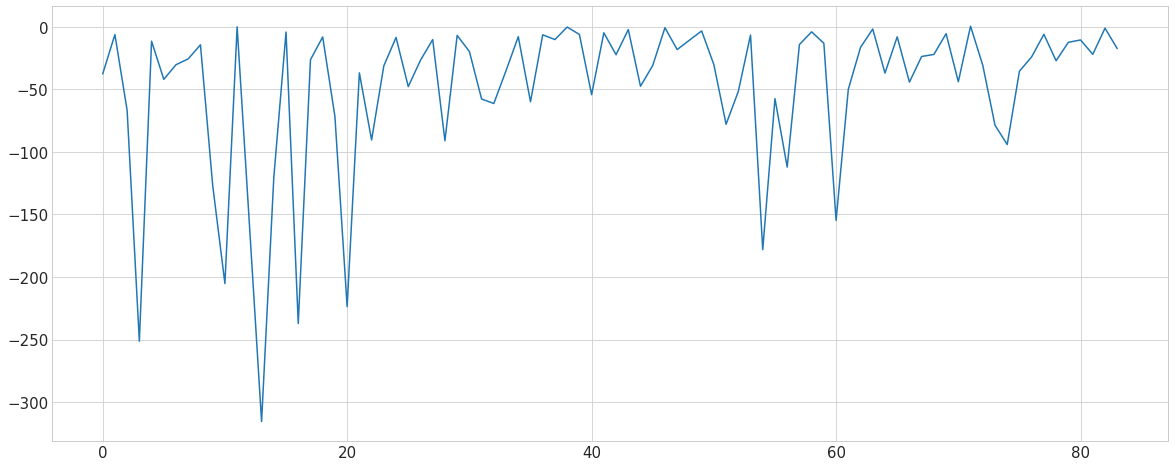

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = [20, 8]
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# for i in range(0, len(plot_list)):
#     if i == 26: continue
#     plt.plot(plot_list[i])
# plt.ylim(-200, 25)

plt.plot(plot_list[0])
# plt.legend(prop={'size': 20})
# plt.xlabel('Iteration', fontsize=15)
# plt.ylabel('Ln P', fontsize=15)

In [4]:
len(plot_list)

179

In [5]:
reward_list = []
episodelength_list = []
collision_list = []
for i in range(NUM_EVAL_EPISODES):
    env.reset()
    current_state = env.current_state_id
    episode_reward = 0
    episode_length = 0
    episode_collision = 0

    while env.terminal==False:
        action =epsilon_greedy(Q[current_state], EPSILON)
        S = env.step(action)
        if env.terminal == True:
            R = 10
        elif env.collided == True:
            R = -0.1
            episode_collision += 1
        else: 
            R = -0.01
        episode_reward += R
        episode_length += 1
        current_state = env.current_state_id
    reward_list.append(episode_reward)
    episodelength_list.append(episode_length)
    collision_list.append(episode_collision)
    print ("episodes: ", i)
        
        

episodes:  0
episodes:  1
episodes:  2
episodes:  3
episodes:  4
episodes:  5
episodes:  6
episodes:  7
episodes:  8
episodes:  9
episodes:  10
episodes:  11
episodes:  12
episodes:  13
episodes:  14
episodes:  15
episodes:  16
episodes:  17
episodes:  18
episodes:  19
episodes:  20
episodes:  21
episodes:  22
episodes:  23
episodes:  24
episodes:  25
episodes:  26
episodes:  27
episodes:  28
episodes:  29
episodes:  30
episodes:  31
episodes:  32
episodes:  33
episodes:  34
episodes:  35
episodes:  36
episodes:  37
episodes:  38
episodes:  39
episodes:  40
episodes:  41
episodes:  42
episodes:  43
episodes:  44
episodes:  45
episodes:  46
episodes:  47
episodes:  48
episodes:  49
episodes:  50
episodes:  51
episodes:  52
episodes:  53
episodes:  54
episodes:  55
episodes:  56
episodes:  57
episodes:  58
episodes:  59
episodes:  60
episodes:  61
episodes:  62
episodes:  63
episodes:  64
episodes:  65
episodes:  66
episodes:  67
episodes:  68
episodes:  69
episodes:  70
episodes:  71
ep

In [6]:
np.mean(episodelength_list)

234.23

In [7]:
np.mean(reward_list)

7.503900000000026

In [8]:
np.mean(collision_list)

1.82